# Section 1. Introduction to the problem and dataset

## **1.1 Project Overview**  
The Labor Force Survey (LFS) is a nationwide quarterly survey conducted to collect key employment statistics, such as employment status, hours worked, and wages. Understanding labor market trends is crucial for policymakers, businesses, and economists to make informed decisions.  

This project aims to analyze the **Labor Force Survey 2016** dataset and build predictive models to extract meaningful insights about employment patterns. 

## **1.2 Objective and Research Questions**  
The primary objective of this study is to develop machine learning models to analyze labor market trends. We aim to answer the following key questions:    
- **Regression**: Can we estimate a worker's daily wage based on their demographic, education, industry, and work hours? 

# Section 2. Description of the dataset

## **2.1 Dataset Overview**  
The **2016 Labor Force Survey (LFS)** dataset contains demographic, educational, and employment-related attributes of individuals. Each row represents a surveyed person, with the following key features:

### **Key Features**

#### **Demographics**
- **PUFREG** - Region where surveyed person lives  
- **PUFPRV** - Code assigned to province  
- **PUFC04_SEX** - Sex of the person  
- **PUFC05_AGE** - Age of the person  
- **PUFC06_MSTAT** - Marital status  
- **PUFC07_GRADE** - Highest education level attained  
- **PUFC08_CURSCH** - Currently attending school (Yes/No)  
- **PUFC09_GRADTECH** - Graduate of technical or vocational course (Yes/No)  

#### **Employment Status**
- **PUFC11_WORK** - Worked at least one hour in the past week (Yes/No)  
- **PUFC12_JOB** - Did not work but has a job or business  
- **PUFC14_PROCC** - Primary occupation  
- **PUFC16_PKB** - Industry of employment  
- **PUFC17_NATEM** - Nature of employment  

#### **Work Hours & Job Search**
- **PUFC18_PNWHRS** - Normal working hours per day  
- **PUFC19_PHOURS** - Actual hours worked  
- **PUFC20_PWMORE** - Wants more work hours (Yes/No)  
- **PUFC30_LOOKW** - Looked for work in the past week (Yes/No)  
- **PUFC33_WEEKS** - Number of weeks spent looking for work  

#### **Wage & Compensation**
- **PUFC24_PBASIS** - Payment basis (e.g., daily, weekly)  
- **PUFC25_PBASIC** - Basic wage  
- **PUFC26_OJOB** - Has additional jobs (Yes/No)  
- **PUFC27_NJOBS** - Number of jobs held  
- **PUFC28_THOURS** - Total hours worked across all jobs 

This dataset is publicly available from the **Philippine Statistics Authority (PSA)** and was collected through household surveys. The data provides valuable insights into employment trends and workforce characteristics.  

---
## **Machine Learning Approach**  
To extract insights from the data, we will apply the following steps:  

* **Data Preprocessing & Cleaning:** Handle missing values, encode categorical features, and normalize numerical values.  
* **Exploratory Data Analysis (EDA):** Identify trends, distributions, and relationships between features.  
* **Model Training & Evaluation:** Compare different machine learning models for classification and/or regression.  
* **Hyperparameter Tuning:** Optimize models to improve performance.  
* **Insights & Conclusions:** Interpret results and discuss real-world implications.  

# Section 3. List of requirements

## 3.1 Libraries used
This notebook uses the following Python libraries:
* `matplotlib` — Allows us to create plots and graphs easily, with support for other common Python libraries, some of which are also used in this notebook
* `numpy` — Contains a large number of mathematical and numerical functions that makes working with operations like `sqrt` and `log` easier and more efficient, as well as containing functions for operating with numerical data series
* `pandas` — Contains the classes `DataFrames` and `Series` that can be used to make working with structured data sets easier
* `scikit-learn` — Contains implementations of many machine learning models for data analysis in both classification and regression tasks
* `seaborn` — Extends the features of `matplotlib` to make creating certain kinds of plots such as histograms and box plots much more convenient

The following cell shall import all the necessary libraries in this notebook. If it fails to load, please use `pip` to install these libraries.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor

# Section 4. Data preprocessing and cleaning

Before we can analyze and model the data, we need to ensure its quality by performing essential data cleaning steps. This involves handling missing values, correcting data types, dealing with duplicates, and addressing potential outliers.

## 4.1 Loading the Dataset 
First, we load the dataset and inspect its structure. This includes:  
✅ Checking the number of rows and columns.  
✅ Displaying the first few rows to understand the format.  
✅ Checking column names and data types.   

In [1]:
# Load the dataset
file_path = "LFS PUF April 2016.CSV"  # Update with the correct path
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows
print(df.head())

# Display dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

df.head()

   PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0       1      28      2800         1           2    405.2219         4   
1       1      28      2800         1           2    388.8280         4   
2       1      28      2800         1           2    406.1194         4   
3       1      28      2800         2           2    405.2219         4   
4       1      28      2800         2           2    384.3556         4   

   PUFSVYYR  PUFPSU  PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
0      2016     217       1  ...                                               
1      2016     217       1  ...                                               
2      2016     217       1  ...                                               
3      2016     217       1  ...                                               
4      2016     217       1  ...                                               

   PUFC36_AVAIL  PUFC37_WILLING PUFC38_PREVJOB PUFC40_POCC PUFC41_WQ

PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0       1      28      2800         1           2    405.2219         4   
1       1      28      2800         1           2    388.8280         4   
2       1      28      2800         1           2    406.1194         4   
3       1      28      2800         2           2    405.2219         4   
4       1      28      2800         2           2    384.3556         4   

   PUFSVYYR  PUFPSU  PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
0      2016     217       1  ...                                               
1      2016     217       1  ...                                               
2      2016     217       1  ...                                               
3      2016     217       1  ...                                               
4      2016     217       1  ...                                               

   PUFC36_AVAIL  PUFC37_WILLING PUFC38_PREVJOB PUFC40_POCC PUFC41_WQTR  \
0                                                                    1   
1                                                                    1   
2                                                                    1   
3                                                                    1   
4                                                                    1   

  PUFC43_QKB PUFNEWEMPSTAT  
0         01             1  
1         01             1  
2         01             1  
3         01             1  
4         96             1  

[5 rows x 50 columns]

## 4.2 Inspect for missing values and duplicates

The first thing we need to do with this dataset is to inspect and remove or fill missing values and duplicate rows, as keeping them on our dataset would introduce errors and inaccuracies as the model will not work with missing values and incorrectly take duplicates at face value; that is, they would assume that they are legitimate data points.

In [2]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [3]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


Fortunately, there are none, so we can move on to the next step immediately.
### 4.2.1 Identify Outliers

Outliers are another thing that we ned to watch out for, as they have the potential to skew model predictions towards values much higher than most values and thus make them generally more inaccurate for most data points.

Here, we will show the raw statistics of each of the three columns that we will be focusing on for data cleaning.

In [100]:
print(df[["PUFC05_AGE", "PUFC19_PHOURS", "PUFC25_PBASIC"]].describe())
df_original = df.copy()  # Store original dataset before cleaning

         PUFC05_AGE  PUFC19_PHOURS  PUFC25_PBASIC
count  35675.000000   35675.000000   35675.000000
mean      35.862172      43.905396     403.928381
std       12.241915      15.635810     307.709085
min       18.000000       0.000000      60.000000
25%       26.000000      40.000000     200.000000
50%       34.000000      48.000000     305.000000
75%       45.000000      48.000000     481.000000
max       99.000000      91.000000    1818.000000


### Columns to Check for Outliers

| Column Name      | Description                         | Why Check? |
|------------------|-------------------------------------|------------|
| **PUFC05_AGE**   | Age of person                      | 0-99 range might contain errors |
| **PUFC25_PBASIC**| Basic pay per day (if available)   | Possible extreme wage values |
| **PUFC19_PHOURS**| Total hours worked last week       | Check for unrealistic work hours |

<!--| **PUFPWGTFIN**   | Final survey weight                | Highly variable distribution |
| **PUFHHSIZE**    | Household size                     | Some values are very large (max = 23) |-->

To calculate for outliers, we shall be defining lower and upper bounds for each of the columns that we will be using. Here, we will be defining our lower and upper bounds as `1.5 * IQR` units below and above the first and third quartiles respectively.

In [102]:
column_name = "PUFC05_AGE"

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])

Number of outliers in PUFC05_AGE: 93


In [6]:
column_name = "PUFPWGTFIN"

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])

Number of outliers in PUFPWGTFIN: 16430


In [7]:
column_name = "PUFHHSIZE"

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])

Number of outliers in PUFHHSIZE: 3539


In [8]:
column_name = "PUFC25_PBASIC"

# Convert column to numeric to avoid errors
df[column_name] = pd.to_numeric(df[column_name], errors="coerce")

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1  

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])

Number of outliers in PUFC25_PBASIC: 2774


In [9]:
column_name = "PUFC19_PHOURS"

# Convert column to numeric
df[column_name] = pd.to_numeric(df[column_name], errors="coerce")

# Compute IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1  

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}:", outliers.shape[0])

Number of outliers in PUFC19_PHOURS: 2467


### 4.2.2 Handling Outliers

### Comparison of Outlier Handling Options

| Method                  | Pros                                      | Cons                                           | Best for |
|-------------------------|------------------------------------------|-----------------------------------------------|----------|
| **Keep Outliers**       | Preserves all data, no loss of information | May lead to skewed results or poor model performance | Essential survey weights (**PUFPWGTFIN**), valid but extreme cases |
| **Cap (Winsorize)**     | Retains most data while limiting extreme influence | Can artificially reduce variability | Wages (**PUFC25_PBASIC**), household size (**PUFHHSIZE**), work hours (**PUFC19_PHOURS**) |
| **Remove Outliers (IQR Method)** | Ensures cleaner, less skewed data | Risk of removing valid extreme cases, loss of data | When extreme values are likely errors, e.g., unrealistic age (**PUFC05_AGE** < 0 or > 99) |

### Final Decision: Best Outlier Handling Approach for Each Column

| Column Name         | Handling Method    | Why? |
|---------------------|-------------------|------|
| **PUFC05_AGE** (Age) | **Keep only ages 18+** | The legal working age is 18, so we filter out younger values. |
| **PUFC25_PBASIC** (Basic Pay Per Day) | **Cap (Winsorize)** | Retains realistic wage data while limiting extreme values. |
| **PUFC19_PHOURS** (Total Hours Worked) | **Cap (Winsorize)** | Prevents unrealistic working hours from distorting the analysis. |

<!--
| **PUFPWGTFIN** (Final Survey Weight) | **Keep as is** | Removing or modifying this weight would distort the survey's accuracy. |
| **PUFHHSIZE** (Household Size) | **Cap (Winsorize)** | Large families exist, but capping prevents extreme influence. |
-->


In [10]:
# Keep PUFPWGTFIN as is (survey weight)
df["PUFPWGTFIN"] = df["PUFPWGTFIN"]  # No modification

# Remove ages below 18 (legal working age)
df = df[df["PUFC05_AGE"] >= 18]

# Cap extreme values for other numerical columns
for column in ["PUFHHSIZE", "PUFC25_PBASIC", "PUFC19_PHOURS"]:
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Print new dataset shape after cleaning
print("New dataset shape after applying outlier handling:", df.shape)

New dataset shape after applying outlier handling: (111715, 50)


### 4.2.3 **Observations: Outlier Handling Impact**

#### **1. Household Size (PUFHHSIZE)**
- **Before Cleaning:** Data is right-skewed, with a long tail extending beyond 15.
- **After Cleaning:** Distribution is more compact, with extreme values capped at a reasonable level.
- **Effect:** Prevents large household sizes from distorting statistical analysis.

#### **2. Basic Pay Per Day (PUFC25_PBASIC)**
- **Before Cleaning:** Extreme outliers create a highly skewed distribution, making the histogram difficult to interpret.
- **After Cleaning:** Data is more normally distributed, with extreme wages capped.
- **Effect:** Ensures wage data remains realistic while preserving key trends.

#### **3. Total Hours Worked (PUFC19_PHOURS)**
- **Before Cleaning:** A significant spike at lower values, but extreme values cause right skew.
- **After Cleaning:** More balanced distribution with extreme work hours capped.
- **Effect:** Prevents unrealistic work-hour values from biasing results.

#### **Key Takeaways**
- Winsorizing (capping) effectively reduces the influence of extreme values while preserving overall data structure.
- Log-scaling improved visualization for highly skewed distributions (e.g., wages and work hours).
- The cleaned dataset is now better suited for analysis without excessive distortion from outliers.


In [11]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 111715 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           111715 non-null  int64  
 1   PUFPRV           111715 non-null  int64  
 2   PUFPRRCD         111715 non-null  int64  
 3   PUFHHNUM         111715 non-null  int64  
 4   PUFURB2K10       111715 non-null  int64  
 5   PUFPWGTFIN       111715 non-null  float64
 6   PUFSVYMO         111715 non-null  int64  
 7   PUFSVYYR         111715 non-null  int64  
 8   PUFPSU           111715 non-null  int64  
 9   PUFRPL           111715 non-null  int64  
 10  PUFHHSIZE        111715 non-null  int64  
 11  PUFC01_LNO       111715 non-null  int64  
 12  PUFC03_REL       111715 non-null  int64  
 13  PUFC04_SEX       111715 non-null  int64  
 14  PUFC05_AGE       111715 non-null  int64  
 15  PUFC06_MSTAT     111715 non-null  object 
 16  PUFC07_GRADE     111715 non-null  object 
 

PUFREG         PUFPRV       PUFPRRCD       PUFHHNUM  \
count   111715.000000  111715.000000  111715.000000  111715.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         9.308723      46.042617    4606.864960   20295.618565   
std          4.672374      24.965871    2496.621214   11821.069561   
min          1.000000       1.000000     100.000000       1.000000   
25%          5.000000      24.000000    2402.000000   10046.000000   
50%         10.000000      46.000000    4600.000000   20304.000000   
75%         13.000000      71.000000    7107.000000   30593.000000   
max         17.000000      98.000000    9804.000000   40880.000000   

           PUFURB2K10     PUFPWGTFIN  PUFSVYMO  PUFSVYYR         PUFPSU  \
count   111715.000000  111715.000000  111715.0  111715.0  111715.000000   
unique            NaN            NaN       NaN       NaN            NaN   
top               NaN            NaN       NaN       NaN            NaN   
freq              NaN            NaN       NaN       NaN            NaN   
mean         1.554124     572.407104       4.0    2016.0     387.651972   
std          0.497064     515.442762       0.0       0.0     444.322645   
min          1.000000      34.998400       4.0    2016.0       1.000000   
25%          1.000000     243.128200       4.0    2016.0     105.000000   
50%          2.000000     387.243600       4.0    2016.0     243.000000   
75%          2.000000     699.750500       4.0    2016.0     482.000000   
max          2.000000    4509.316000       4.0    2016.0    3053.000000   

               PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
count   111715.000000  ...        111715        111715          111715   
unique            NaN  ...            36            10               4   
top               NaN  ...                                               
freq              NaN  ...        109501         74970          110224   
mean         2.489898  ...           NaN           NaN             NaN   
std          1.118382  ...           NaN           NaN             NaN   
min          1.000000  ...           NaN           NaN             NaN   
25%          1.000000  ...           NaN           NaN             NaN   
50%          2.000000  ...           NaN           NaN             NaN   
75%          3.000000  ...           NaN           NaN             NaN   
max          4.000000  ...           NaN           NaN             NaN   

        PUFC36_AVAIL  PUFC37_WILLING PUFC38_PREVJOB PUFC40_POCC PUFC41_WQTR  \
count         111715          111715         111715      111715      111715   
unique             3               3              3          44           3   
top                                                                       1   
freq          106000          106000          72756       84674       71135   
mean             NaN             NaN            NaN         NaN         NaN   
std              NaN             NaN            NaN         NaN         NaN   
min              NaN             NaN            NaN         NaN         NaN   
25%              NaN             NaN            NaN         NaN         NaN   
50%              NaN             NaN            NaN         NaN         NaN   
75%              NaN             NaN            NaN         NaN         NaN   
max              NaN             NaN            NaN         NaN         NaN   

       PUFC43_QKB PUFNEWEMPSTAT  
count      111715        111715  
unique         89             4  
top                           1  
freq        40580         69204  
mean          NaN           NaN  
std           NaN           NaN  
min           NaN           NaN  
25%           NaN           NaN  
50%           NaN           NaN  
75%           NaN           NaN  
max           NaN           NaN  

[11 rows x 50 columns]

In [12]:
for col in df.select_dtypes(include=["object", "category"]):
    print(f"{col}: {df[col].unique()}")

PUFC06_MSTAT: ['2' '1' '3' '4' '6' '5']
PUFC07_GRADE: ['350' '320' '622' '672' '240' '220' '614' '330' '280' '632' '900' '820'
 '589' '572' '250' '830' '634' '230' '810' '686' '581' '681' '552' '534'
 '840' '658' '000' '548' '310' '648' '210' '652' '662' '601' '642' '562'
 '685' '631' '684' '340' '584' '621' '410' '010' '420' '664' '676' '260'
 '521' '638' '554' '646' '689' '522' '654' '644' '532' '531' '514' '558'
 '501' '586' '542' '576' '544' '585' '564']
PUFC08_CURSCH: [' ' '2' '1']
PUFC09_GRADTECH: ['2' '1']
PUFC10_CONWR: ['5' '1' '2' '4' '3']
PUFC11_WORK: ['1' '2' ' ']
PUFC12_JOB: [' ' '2' '1']
PUFC14_PROCC: ['61' '92' '91' '52' '53' '13' '  ' '54' '93' '12' '71' '11' '83' '14'
 '51' '33' '44' '75' '42' '34' '96' '22' '62' '23' '72' '26' '41' '21'
 '43' '24' '74' '31' '82' '35' '94' '73' '25' '32' '81' '95' '02' '01'
 '03' '63']
PUFC16_PKB: ['01' '96' '47' '84' '49' '  ' '80' '41' '43' '45' '56' '46' '85' '53'
 '10' '92' '11' '74' '94' '55' '91' '86' '03' '38' '52' '72' '31' '64'

Now, we convert blank strings to `NaN` values.

In [13]:
# Replace all blank spaces in object (categorical) columns with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Verify missing values after replacement
print(df.isnull().sum()[df.isnull().sum() > 0])

PUFC08_CURSCH      88798
PUFC11_WORK         3552
PUFC12_JOB         71697
PUFC14_PROCC       42511
PUFC16_PKB         42511
PUFC17_NATEM       42511
PUFC18_PNWHRS      42511
PUFC19_PHOURS      42511
PUFC20_PWMORE      42511
PUFC21_PLADDW      42511
PUFC22_PFWRK       42511
PUFC23_PCLASS      42511
PUFC24_PBASIS      70813
PUFC25_PBASIC      76040
PUFC26_OJOB        42511
PUFC27_NJOBS      105865
PUFC28_THOURS      42511
PUFC29_WWM48H      94867
PUFC30_LOOKW       72756
PUFC31_FLWRK      109501
PUFC32_JOBSM      109501
PUFC33_WEEKS      109501
PUFC34_WYNOT       74970
PUFC35_LTLOOKW    110224
PUFC36_AVAIL      106000
PUFC37_WILLING    106000
PUFC38_PREVJOB     72756
PUFC40_POCC        84674
PUFC41_WQTR        15470
PUFC43_QKB         40580
PUFNEWEMPSTAT       3552
dtype: int64


Convert Numeric-Like Categorical Columns to Category Type
Some columns (e.g., marital status (PUFC06_MSTAT), job category (PUFC14_PROCC)) use numeric codes as categorical values. Convert them properly:

In [14]:
# List of categorical columns that have numeric-like values
categorical_cols = [
    "PUFC06_MSTAT", "PUFC08_CURSCH", "PUFC09_GRADTECH", 
    "PUFC10_CONWR", "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC16_PKB",
    "PUFC17_NATEM", "PUFC20_PWMORE", "PUFC21_PLADDW", 
    "PUFC22_PFWRK", "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC26_OJOB", 
    "PUFC27_NJOBS", "PUFC28_THOURS", "PUFC29_WWM48H", "PUFC30_LOOKW",
    "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT", 
    "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", "PUFC38_PREVJOB",
    "PUFC40_POCC", "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT"
]

# Convert categorical columns to 'category' type
df[categorical_cols] = df[categorical_cols].astype("category")

# Verify conversion
print(df.dtypes[categorical_cols])

PUFC06_MSTAT       category
PUFC08_CURSCH      category
PUFC09_GRADTECH    category
PUFC10_CONWR       category
PUFC11_WORK        category
PUFC12_JOB         category
PUFC14_PROCC       category
PUFC16_PKB         category
PUFC17_NATEM       category
PUFC20_PWMORE      category
PUFC21_PLADDW      category
PUFC22_PFWRK       category
PUFC23_PCLASS      category
PUFC24_PBASIS      category
PUFC26_OJOB        category
PUFC27_NJOBS       category
PUFC28_THOURS      category
PUFC29_WWM48H      category
PUFC30_LOOKW       category
PUFC31_FLWRK       category
PUFC32_JOBSM       category
PUFC33_WEEKS       category
PUFC34_WYNOT       category
PUFC35_LTLOOKW     category
PUFC36_AVAIL       category
PUFC37_WILLING     category
PUFC38_PREVJOB     category
PUFC40_POCC        category
PUFC41_WQTR        category
PUFC43_QKB         category
PUFNEWEMPSTAT      category
dtype: object


Now, we need to decide how to fill missing values (formerly blank spaces):
Filling with mode ensures missing values don’t affect machine learning models.
If missing values contain meaningful info (e.g., "Not Applicable"), we can instead:

In [15]:
# Replace blank spaces with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Ensure categorical columns have a 'Not Applicable' category before filling
for col in categorical_cols:
    if df[col].dtype.name == "category":
        df[col] = df[col].cat.add_categories("Not Applicable")  # Add category
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing with mode

# Verify that no missing values remain
print(df.isnull().sum()[df.isnull().sum() > 0])  # Should return an empty list

PUFC18_PNWHRS    42511
PUFC19_PHOURS    42511
PUFC25_PBASIC    76040
dtype: int64


Impute Missing Work Hours (PUFC19_PHOURS) Fill with median (robust to outliers)

In [16]:
df["PUFC19_PHOURS"].fillna(df["PUFC19_PHOURS"].median(), inplace=True)

C:\Users\Default.DESKTOP-0VEK9RN\AppData\Local\Temp\ipykernel_4376\1584605340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PUFC19_PHOURS"].fillna(df["PUFC19_PHOURS"].median(), inplace=True)


Drop rows with missing Basic Pay (PUFC25_PBASIC)

In [17]:
# df["PUFC25_PBASIC"].fillna(df["PUFC25_PBASIC"].median(), inplace=True)
df = df[df['PUFC25_PBASIC'].notna()]

Encode Categorical Variables for ML (Optional)
If you’re preparing the data for machine learning, we must encode categorical variables:
(not sure yet which one we should use so just set it as label encoding for the time being)

 Label Encoding (Best for Tree-Based Models like Decision Trees, Random Forest)

In [18]:
"""
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transform if needed

# Check encoded values
print(df.head())
"""

pass

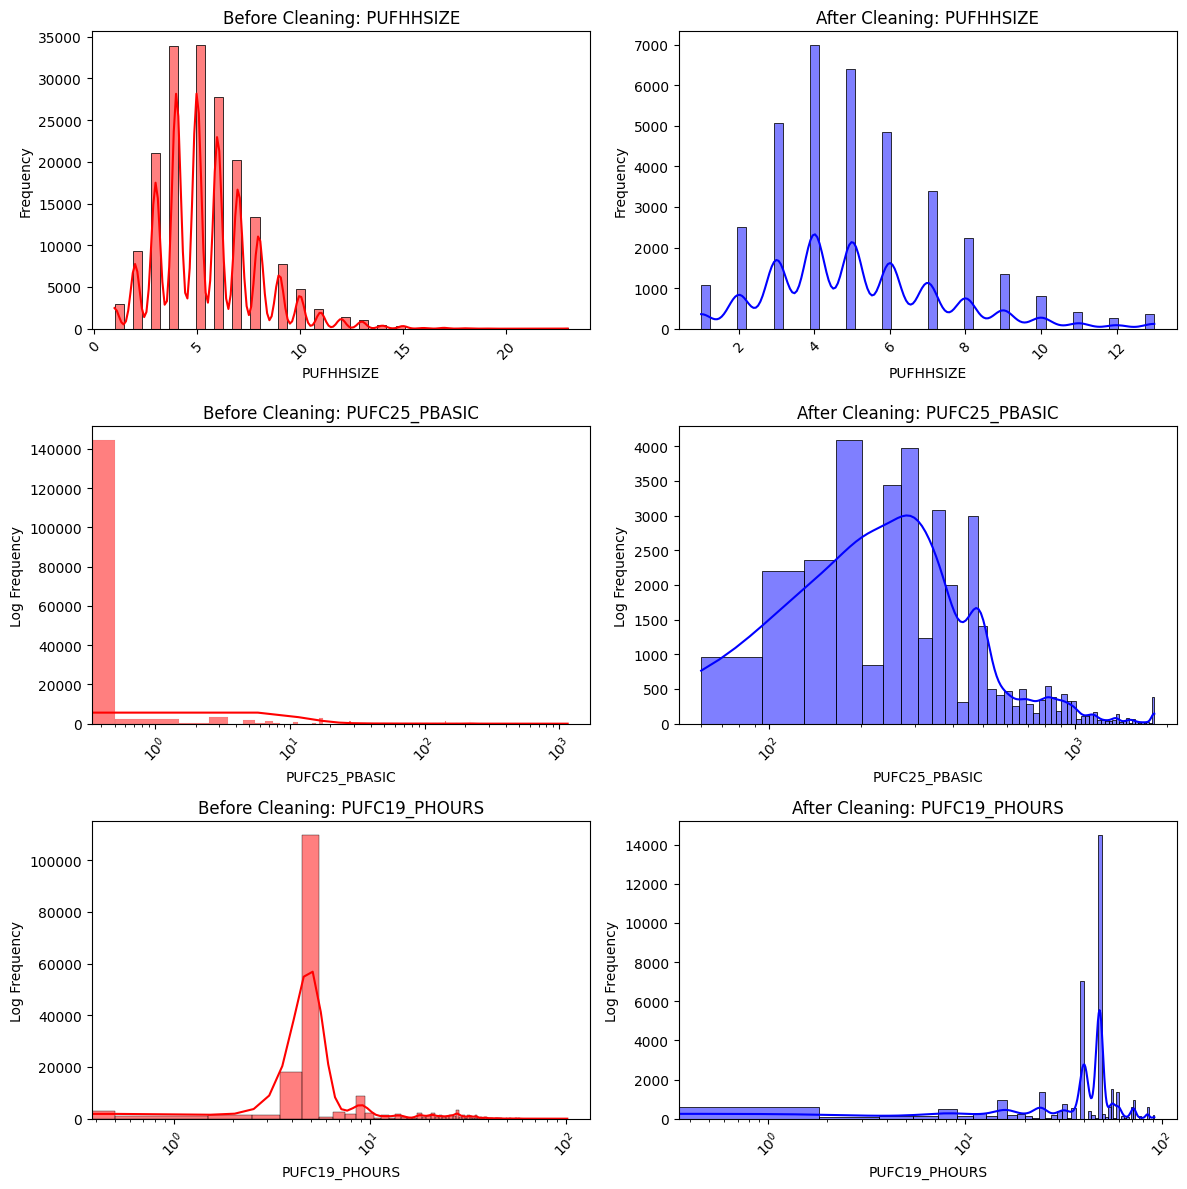

In [20]:
# Columns to compare
columns = ["PUFHHSIZE", "PUFC25_PBASIC", "PUFC19_PHOURS"]

# Set up subplots
fig, axes = plt.subplots(len(columns), 2, figsize=(12, len(columns) * 4))

for i, column in enumerate(columns):
    # Before Cleaning
    sns.histplot(df_original[column], bins=50, kde=True, ax=axes[i, 0], color="red")
    axes[i, 0].set_title(f"Before Cleaning: {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for readability

    # After Cleaning
    sns.histplot(df[column], bins=50, kde=True, ax=axes[i, 1], color="blue")
    axes[i, 1].set_title(f"After Cleaning: {column}")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Frequency")
    axes[i, 1].tick_params(axis="x", rotation=45)

    # Apply log scale for highly skewed data
    if column in ["PUFC25_PBASIC", "PUFC19_PHOURS"]:
        axes[i, 0].set_xscale("log")
        axes[i, 1].set_xscale("log")
        axes[i, 0].set_ylabel("Log Frequency")
        axes[i, 1].set_ylabel("Log Frequency")

plt.tight_layout()
plt.show()

In [21]:
print(df.describe())
print("Dataset Shape:", df.shape)

             PUFREG        PUFPRV      PUFPRRCD      PUFHHNUM    PUFURB2K10  \
count  35675.000000  35675.000000  35675.000000  35675.000000  35675.000000   
mean       9.217659     47.196104   4722.940939  20020.609811      1.451661   
std        4.554187     24.933884   2493.132230  11473.477877      0.497665   
min        1.000000      1.000000    100.000000      1.000000      1.000000   
25%        5.000000     24.000000   2402.000000  10113.500000      1.000000   
50%       10.000000     49.000000   4900.000000  20407.000000      1.000000   
75%       13.000000     74.000000   7402.000000  29799.500000      2.000000   
max       17.000000     98.000000   9804.000000  40878.000000      2.000000   

         PUFPWGTFIN  PUFSVYMO  PUFSVYYR        PUFPSU        PUFRPL  \
count  35675.000000   35675.0   35675.0  35675.000000  35675.000000   
mean     600.587370       4.0    2016.0    405.018949      2.492249   
std      551.435553       0.0       0.0    467.742886      1.114570   
min 

The resulting dataset shape after cleaning is (111715, 50) from (180862, 50). 

In [22]:
# Add log of PBASIC
df["log_PBASIC"] = np.log(df["PUFC25_PBASIC"])

## 4.3 Labeling Values

The column `PUFC07_GRADE` is encoded as a value between 0 and 900 that represents the highest grade completed by the person. However, this encoding is not well-suited for machine learning tasks due to its structure; thus this needs to be cleaned first. This step also merges all post-secondary courses together to avoid data discrepancies based on taken course.

This mapping references [the PSA's data dictionary for this dataset](https://catalog.ihsn.org/catalog/7417/data-dictionary/F1?file_name=lfs_april2016).

In [23]:
df["PUFC07_GRADE"] = pd.to_numeric(df["PUFC07_GRADE"]).map({
    0: 0, # No grade completed
    10: 1, # Preschool
    210: 2, # Grade 1
    220: 3, # Grade 2
    230: 4, # Grade 3
    240: 5, # Grade 4
    250: 6, # Grade 5
    260: 7, # Grade 6
    280: 8, # Elementary graduate
    
    310: 11, # Grade 7
    320: 12, # Grade 8
    330: 13, # Grade 9
    340: 14, # Grade 10
    350: 15, # High School Graduate

    410: 21, # First Year Post-Secondary
    420: 22, # Second Year Post-Secondary
    810: 21, # First Year College
    820: 22, # Second Year College
    830: 23, # Third Year College
    840: 24, # Fourth Year College
    900: 30, # Post Baccalaureate

    # Post-secondary Graduates
    501: 25,	508: 25,	509: 25,	514: 25,
    521: 25,	522: 25,	531: 25,	532: 25,
    534: 25,	542: 25,	544: 25,	548: 25,
    552: 25,	554: 25,	558: 25,	562: 25,
    564: 25,	572: 25,	576: 25,	581: 25,
    584: 25,	585: 25,	586: 25,	589: 25,

    # College Graduates
    601: 25,	614: 25,	621: 25,	622: 25,
    631: 25,	632: 25,	634: 25,	638: 25,
    642: 25,	644: 25,	646: 25,	648: 25,
    652: 25,	654: 25,	658: 25,	662: 25,
    664: 25,	672: 25,	676: 25,	681: 25,
    684: 25,	685: 25,	686: 25,	689: 25,
})

df["PUFC07_GRADE"].value_counts()

PUFC07_GRADE
15    10437
25     9821
8      3512
22     1600
12     1562
13     1359
21     1303
6      1070
23      935
5       904
11      886
4       790
3       485
2       258
30      257
0       226
24      149
7       110
1         8
14        3
Name: count, dtype: int64

# Section 5. Exploratory data analysis

The next step in pre-processing after cleaning the data is the EDA. This section will allow us to see trends within and between the different data features.

To start with, let us create plots to visualize the counts of individual columns that we would be working on which are specifically the following:
1. PUFREG
2. PUFC04_SEX
3. PUFC05_AGE
4. PUFC07_GRADE
5. PUFC18_PNWHRS
6. PUFC19_PHOURS
7. PUFC25_PBASIC

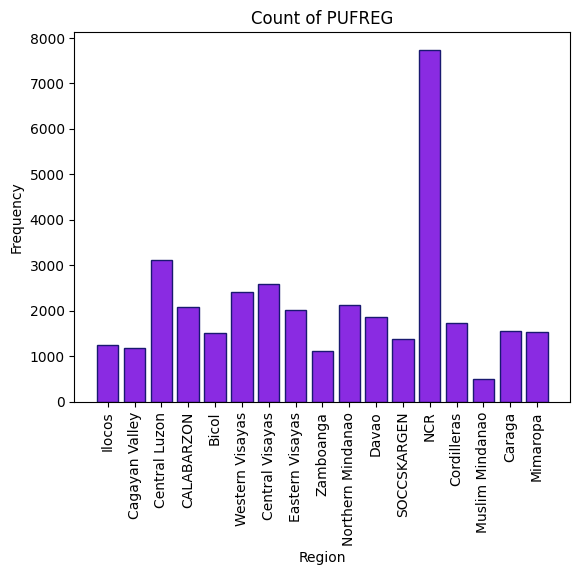

In [24]:
# Generates a histogram for regions
regions = [
    "Ilocos", "Cagayan Valley", "Central Luzon", "CALABARZON", "Bicol",
    "Western Visayas", "Central Visayas", "Eastern Visayas", "Zamboanga",
    "Northern Mindanao", "Davao", "SOCCSKARGEN", "NCR", "Cordilleras",
    "Muslim Mindanao", "Caraga", "Mimaropa"
]
plt.bar(x = regions, height = df["PUFREG"].value_counts().sort_index(), color="blueviolet", edgecolor="midnightblue")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Count of PUFREG")

plt.show()

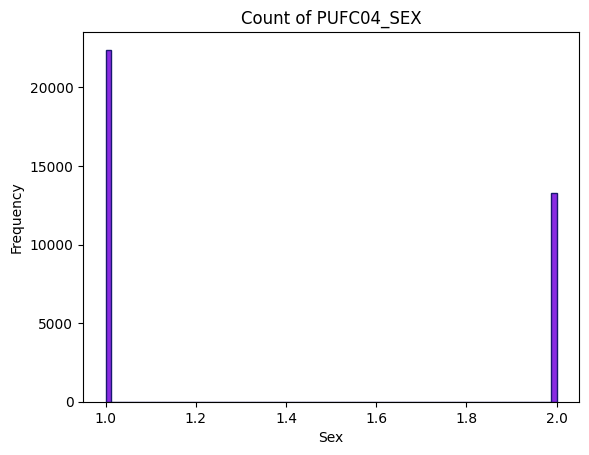

In [25]:
# Generates a histogram for sex
plt.hist(df["PUFC04_SEX"], bins=81, color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Count of PUFC04_SEX")
plt.show()

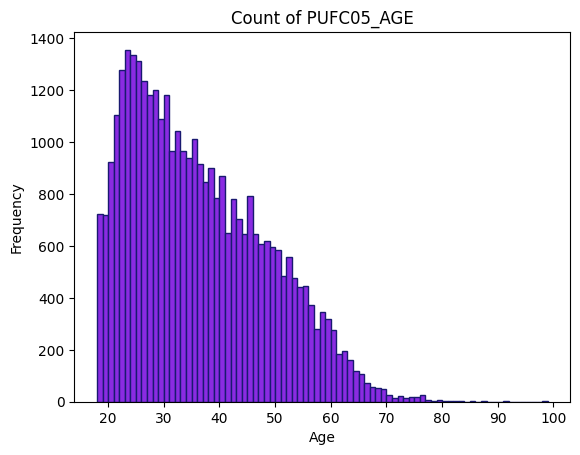

In [26]:
# Generates a histogram for age
plt.hist(df["PUFC05_AGE"], bins=81, color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Count of PUFC05_AGE")
plt.show()

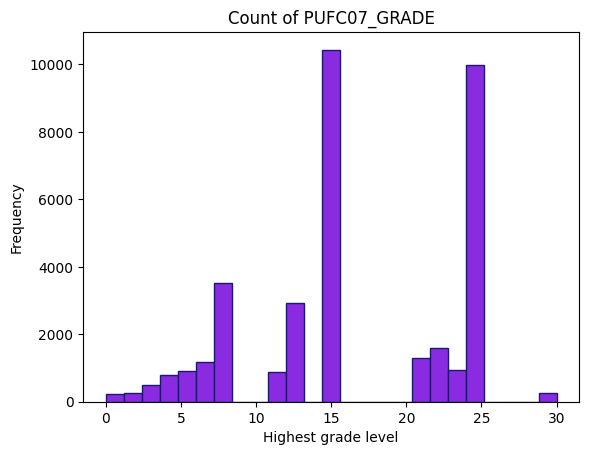

In [27]:
# Generates a histogram for highest grade level
plt.hist(df["PUFC07_GRADE"], bins=25, color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Highest grade level")
plt.ylabel("Frequency")
plt.title("Count of PUFC07_GRADE")
plt.show()

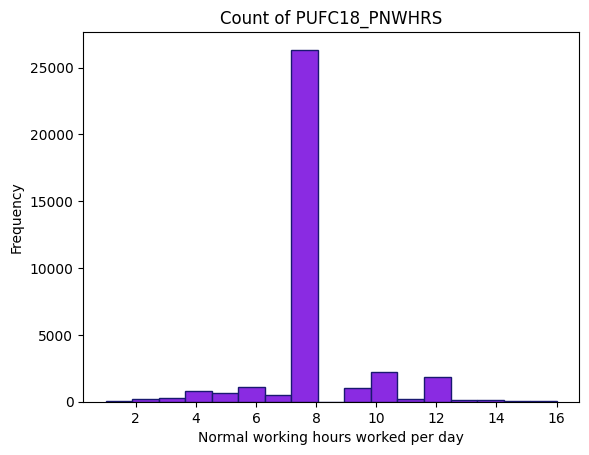

In [28]:
# Generates a histogram for normal working hours

# PUFC18_PNWHRS is classified as an object data type. We will convert this to integer for purposes of being used in the model
df["PUFC18_PNWHRS"] = df["PUFC18_PNWHRS"].astype(int)

plt.hist(df["PUFC18_PNWHRS"], bins="auto", color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Normal working hours worked per day")
plt.ylabel("Frequency")
plt.title("Count of PUFC18_PNWHRS")
plt.show()

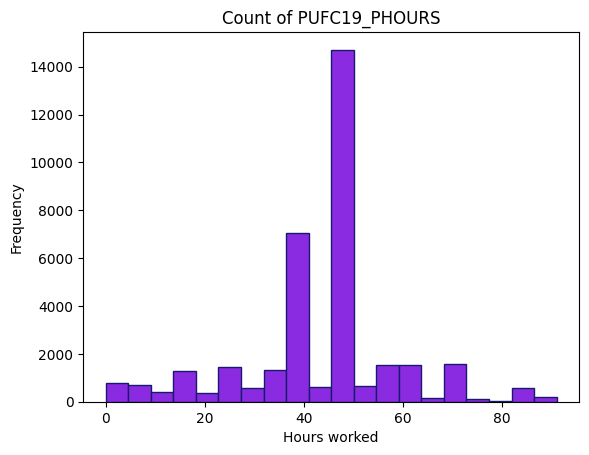

In [29]:
# Generates a histogram for hours worked in a week
plt.hist(df["PUFC19_PHOURS"], bins=20, color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Hours worked")
plt.ylabel("Frequency")
plt.title("Count of PUFC19_PHOURS")
plt.show()

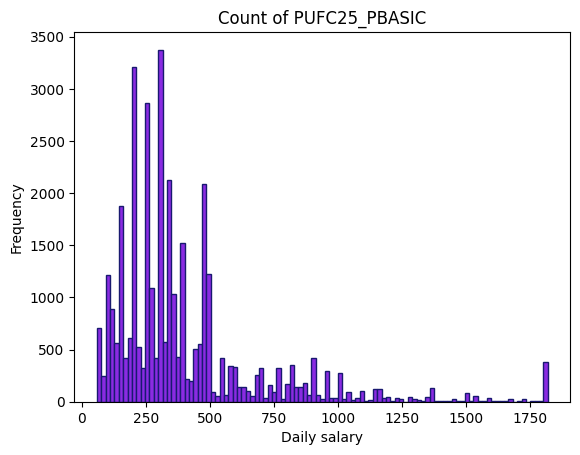

In [30]:
# Generates a histogram for basic pay per day
plt.hist(df["PUFC25_PBASIC"], bins="auto", color="blueviolet", edgecolor="midnightblue")
plt.xlabel("Daily salary")
plt.ylabel("Frequency")
plt.title("Count of PUFC25_PBASIC")
plt.show()

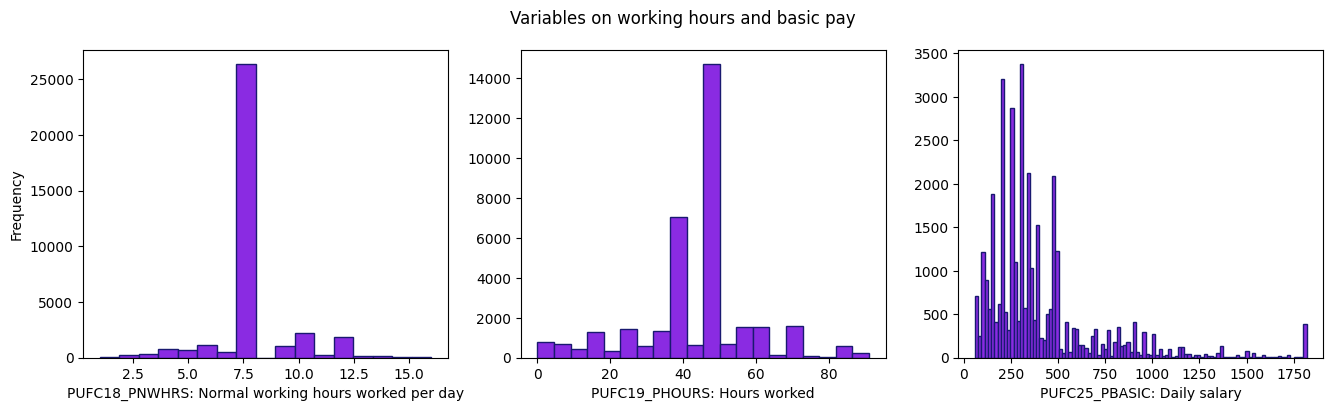

In [31]:
# Generate three plots for variables PUFC18_PNWHRS, PUFC19_PHOURS, and PUFC25_PBASIC
fig, axs = plt.subplots(1,3, figsize=(16,4))
fig.suptitle("Variables on working hours and basic pay")

axs[0].hist(df["PUFC18_PNWHRS"], bins="auto", color="blueviolet", edgecolor="midnightblue")
axs[0].set_xlabel("PUFC18_PNWHRS: Normal working hours worked per day")
axs[0].set_ylabel("Frequency")

axs[1].hist(df["PUFC19_PHOURS"], bins=20, color="blueviolet", edgecolor="midnightblue")
axs[1].set_xlabel("PUFC19_PHOURS: Hours worked")
#axs[1].set_ylabel("Frequency")

axs[2].hist(df["PUFC25_PBASIC"], bins="auto", color="blueviolet", edgecolor="midnightblue")
axs[2].set_xlabel("PUFC25_PBASIC: Daily salary")
#axs[2].set_ylabel("Frequency")

plt.show()

The above three plots on working hours and daily salary all show the effects of the normalization procedure done through data cleaning. As there were a lot of outliers and null values that had to have their values adjusted to be the given variable's mean, we can now see that this mean value appears much more frequently than before. This causes an issue with visualizing and analyzing data, especially when using box plots, as the mean is heavily shifted to this point due to the.

However, to get usable data out of these for the sake of exploratory data analysis, these outlier datapoints should instead be removed entirely from consideration instead of being set to the average. This method would also involve removing regular data points that happened to get set to the median, however if we assume that the graph is a normal curve, data points from the immediate left and right of the median would be able to make up for it.

In [32]:
# new dfs, where we remove all of the mode values for each variable; mode is the same as median per data cleaning above
df_no_mode_phours = df.copy() # for PUFC19_PHOURS
df_no_mode_pbasic = df.copy() # for PUFC25_PBASIC

mode = df_no_mode_phours["PUFC19_PHOURS"].mode()[0]
df_no_mode_phours = df_no_mode_phours[df_no_mode_phours["PUFC19_PHOURS"] != mode]
print(f"Removed mode values at PUFC19_PHOURS = {mode}")
mode = df_no_mode_pbasic["PUFC25_PBASIC"].mode()[0]
df_no_mode_pbasic = df_no_mode_pbasic[df_no_mode_pbasic["PUFC25_PBASIC"] != mode]
print(f"Removed mode values at PUFC25_PBASIC = {mode}")

# for ease of use during dataviz later
df_no_mode_phours["log_PBASIC"] = np.log(df_no_mode_phours["PUFC25_PBASIC"])
df_no_mode_pbasic["log_PBASIC"] = np.log(df_no_mode_pbasic["PUFC25_PBASIC"])

Removed mode values at PUFC19_PHOURS = 48.0
Removed mode values at PUFC25_PBASIC = 200.0


This step leaves us with `66,987` and `35,664` rows for the `PUFC19_PHOURS` and `PUFC25_PBASIC` features respectively, much less than the original dataset's 111,715 but with data that is much more receptive to graphing. Let's try to graph these now:

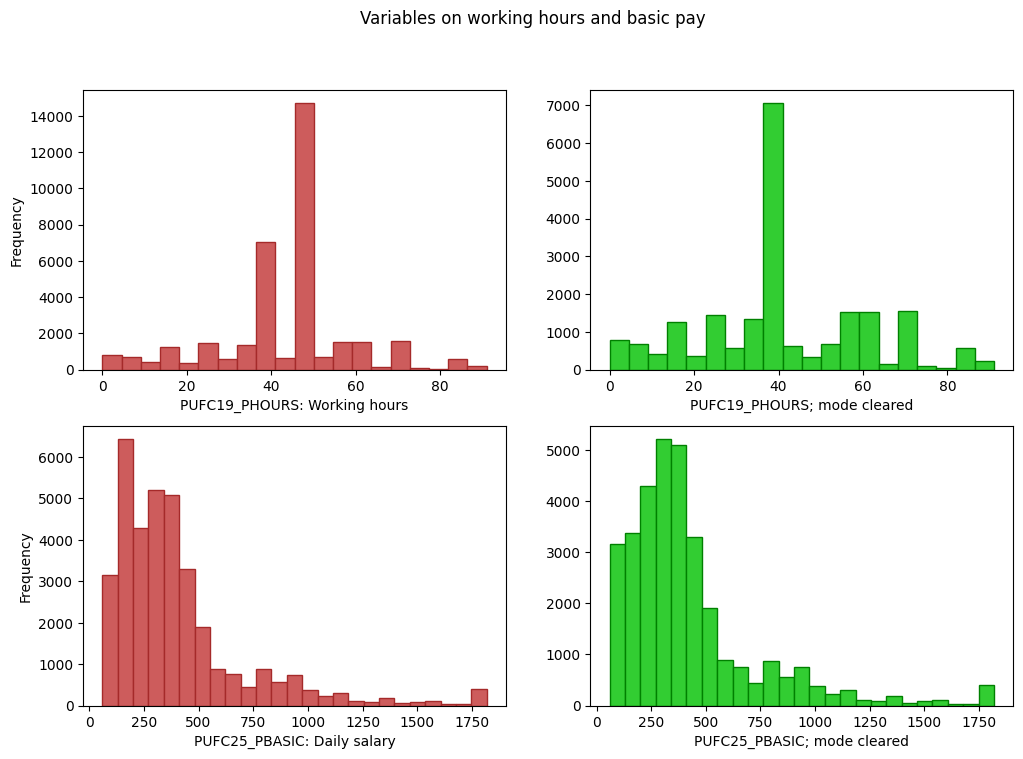

In [33]:
# Generate two plots for variables PUFC18_PNWHRS, PUFC19_PHOURS, and PUFC25_PBASIC
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle("Variables on working hours and basic pay")

# before...
# (make sure to save the bins for consistency's sake!)
bins0 = axs[0,0].hist(df["PUFC19_PHOURS"], bins=20, color="indianred", edgecolor="brown")
axs[0,0].set_xlabel("PUFC19_PHOURS: Working hours")
axs[0,0].set_ylabel("Frequency")

bins1 = axs[1,0].hist(df["PUFC25_PBASIC"], bins=25, color="indianred", edgecolor="brown")
axs[1,0].set_xlabel("PUFC25_PBASIC: Daily salary")
axs[1,0].set_ylabel("Frequency")

# ...and after!
axs[0,1].hist(df_no_mode_phours["PUFC19_PHOURS"], bins=bins0[1], color="limegreen", edgecolor="green")
axs[0,1].set_xlabel("PUFC19_PHOURS; mode cleared")
#axs[0,1].set_ylabel("Frequency")

axs[1,1].hist(df_no_mode_pbasic["PUFC25_PBASIC"], bins=bins1[1], color="limegreen", edgecolor="green")
axs[1,1].set_xlabel("PUFC25_PBASIC; mode cleared")
#axs[1].set_ylabel("Frequency")

plt.show()

With this, we can see that the shape of the plots are much more manageable now. For the `PUFC19_PHOURS` feature, we can see that there is now a massive gap at `42` where the mode used to be which shift measures of central tendency to the right, while the larger gaps between values and larger bin widths at `PUFC25_PBASIC` barely show the difference at where `305` used to be. However, what is most noticeable is that without the numerous items filling up the median, the plot is now much shorter and as such it can now be more effectively used for data visualization in EDA.

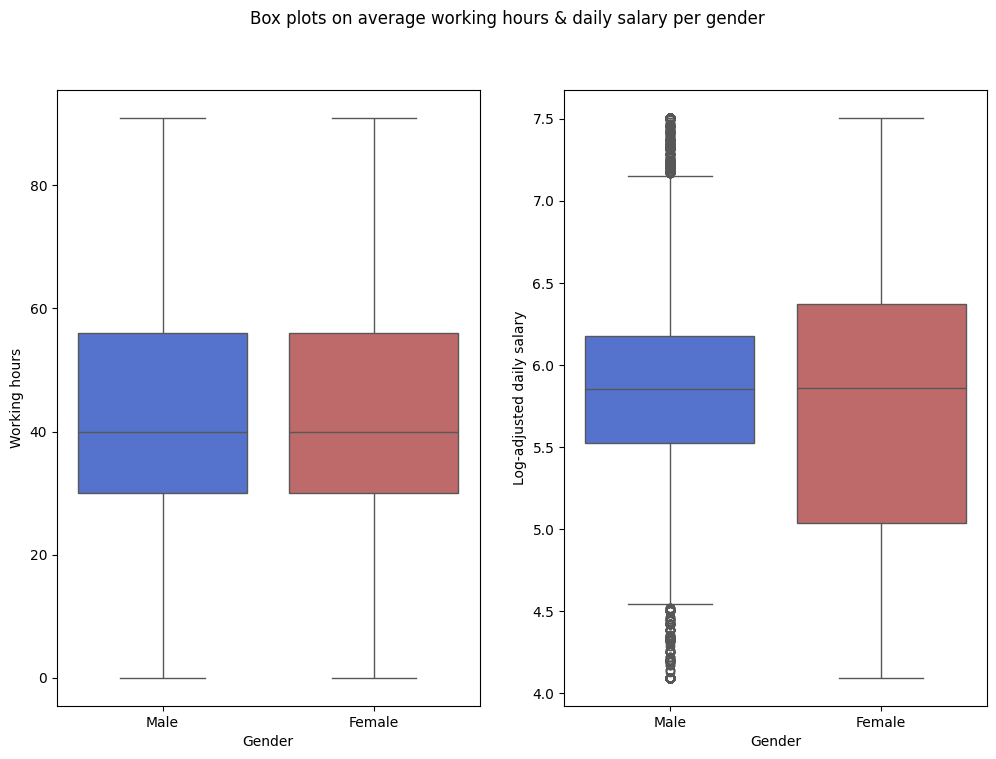

In [34]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("Box plots on average working hours & daily salary per gender")
palette = {1: "royalblue", 2: "indianred"}

sns.boxplot(data = df_no_mode_phours, x="PUFC04_SEX", y = "PUFC19_PHOURS", hue="PUFC04_SEX", ax=axs[0], palette=palette)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Working hours")
axs[0].set_xticks([0,1], ["Male", "Female"])
axs[0].get_legend().remove()

sns.boxplot(data = df_no_mode_pbasic, x="PUFC04_SEX", y = "log_PBASIC", hue="PUFC04_SEX", ax=axs[1], palette=palette)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Log-adjusted daily salary")
axs[1].set_xticks([0,1], ["Male", "Female"])
axs[1].get_legend().remove()

plt.show()

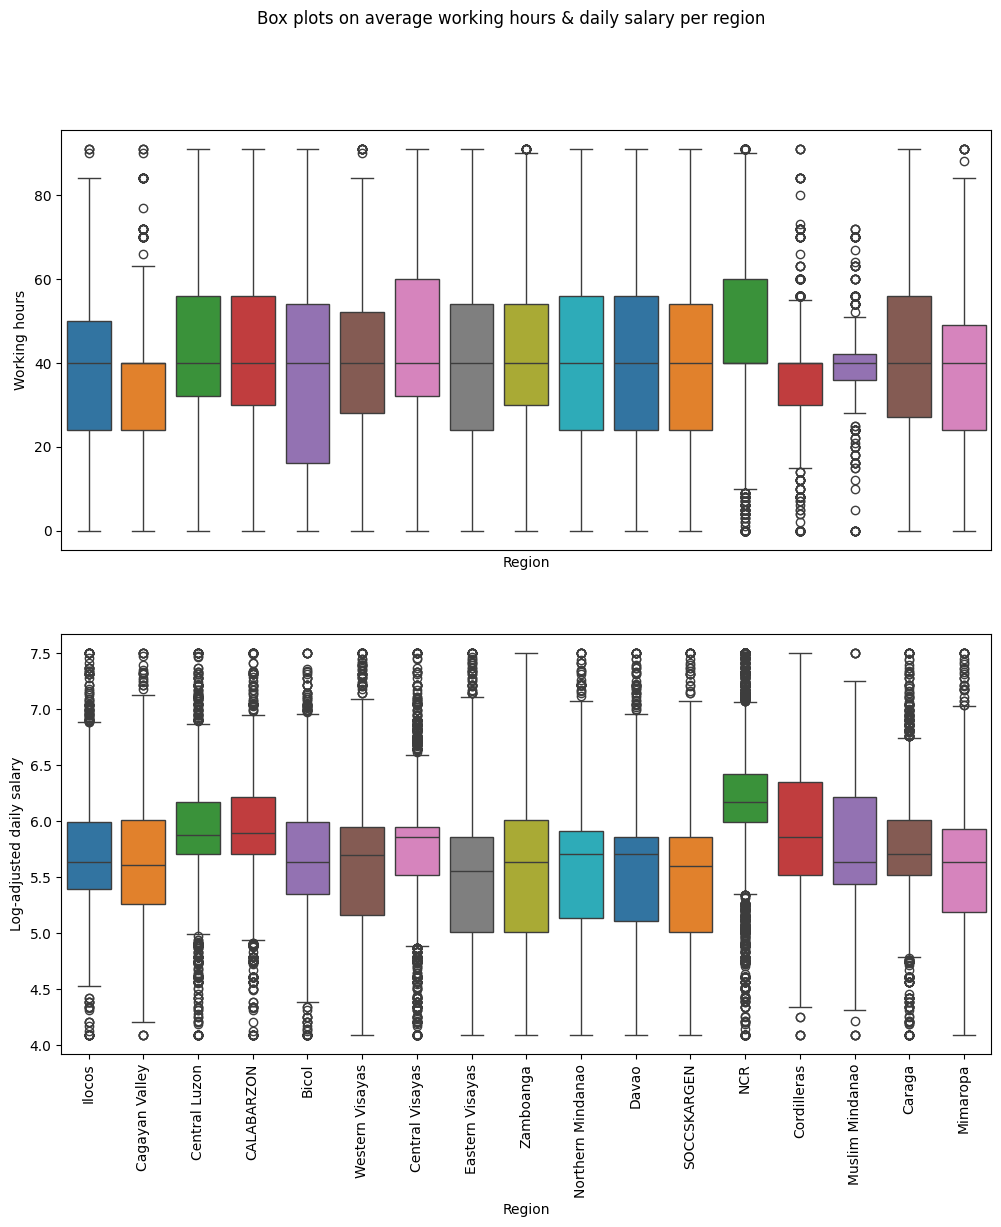

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))
fig.suptitle("Box plots on average working hours & daily salary per region")

palette = sns.color_palette(n_colors = 17)
regions = [
    "Ilocos", "Cagayan Valley", "Central Luzon", "CALABARZON", "Bicol",
    "Western Visayas", "Central Visayas", "Eastern Visayas", "Zamboanga",
    "Northern Mindanao", "Davao", "SOCCSKARGEN", "NCR", "Cordilleras",
    "Muslim Mindanao", "Caraga", "Mimaropa"
]


sns.boxplot(data = df_no_mode_phours, x="PUFREG", y = "PUFC19_PHOURS", hue="PUFREG", ax=axs[0], palette=palette)
axs[0].set_xlabel("Region")
axs[0].set_ylabel("Working hours")
axs[0].set_xticks([])
axs[0].get_legend().remove()

sns.boxplot(data = df_no_mode_pbasic, x="PUFREG", y = "log_PBASIC", hue="PUFREG", ax=axs[1], palette=palette)
axs[1].set_xlabel("Region")
axs[1].set_ylabel("Log-adjusted daily salary")
axs[1].set_xticks(range(0,17), regions, rotation=90)
axs[1].get_legend().remove()

plt.show()

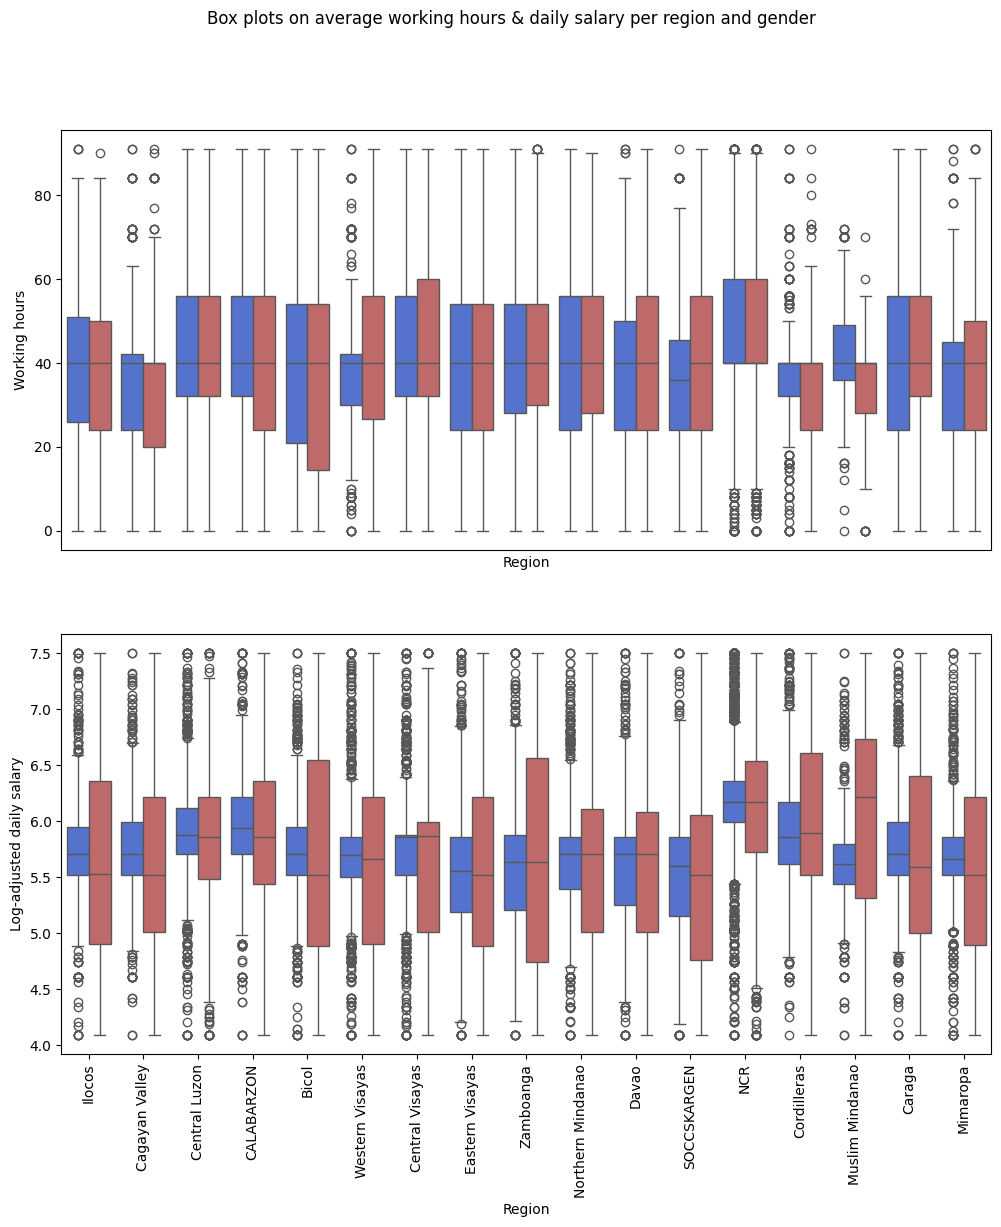

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))
fig.suptitle("Box plots on average working hours & daily salary per region and gender")

palette = {1: "royalblue", 2: "indianred"}
regions = [
    "Ilocos", "Cagayan Valley", "Central Luzon", "CALABARZON", "Bicol",
    "Western Visayas", "Central Visayas", "Eastern Visayas", "Zamboanga",
    "Northern Mindanao", "Davao", "SOCCSKARGEN", "NCR", "Cordilleras",
    "Muslim Mindanao", "Caraga", "Mimaropa"
]


sns.boxplot(data = df_no_mode_phours, x="PUFREG", y = "PUFC19_PHOURS", hue="PUFC04_SEX", ax=axs[0], palette=palette)
axs[0].set_xlabel("Region")
axs[0].set_ylabel("Working hours")
axs[0].set_xticks([])
axs[0].get_legend().remove()

sns.boxplot(data = df_no_mode_pbasic, x="PUFREG", y = "log_PBASIC", hue="PUFC04_SEX", ax=axs[1], palette=palette)
axs[1].set_xlabel("Region")
axs[1].set_ylabel("Log-adjusted daily salary")
axs[1].set_xticks(range(0,17), regions, rotation=90)
axs[1].get_legend().remove()

plt.show()

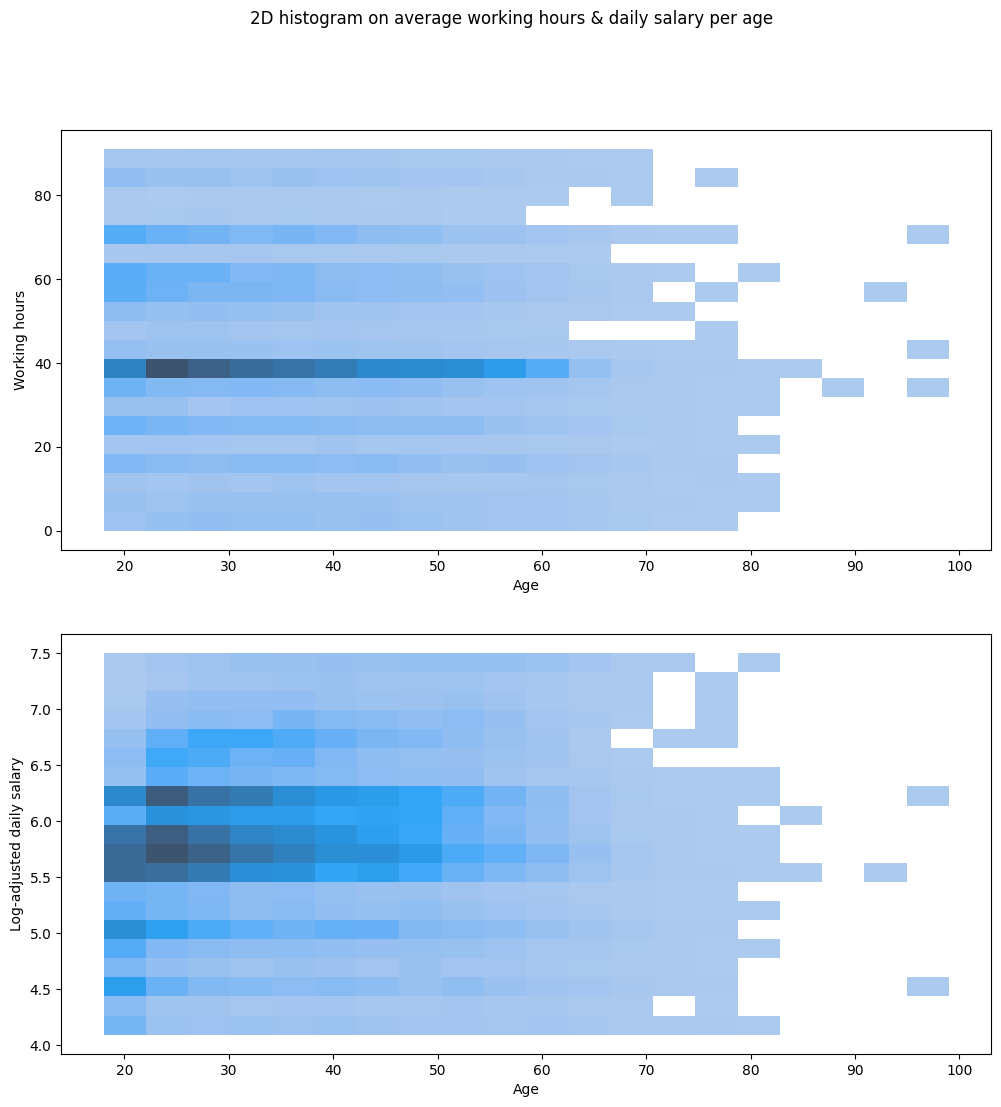

In [37]:
# 2D Histogram for age vs working hours and daily salary
fig, axs = plt.subplots(2, 1, figsize=(12,12))
fig.suptitle("2D histogram on average working hours & daily salary per age")

sns.histplot(data=df_no_mode_phours, x="PUFC05_AGE", y="PUFC19_PHOURS", ax=axs[0], bins=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Working hours")

sns.histplot(data=df_no_mode_pbasic, x="PUFC05_AGE", y="log_PBASIC", ax=axs[1], bins=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Log-adjusted daily salary")

plt.show()

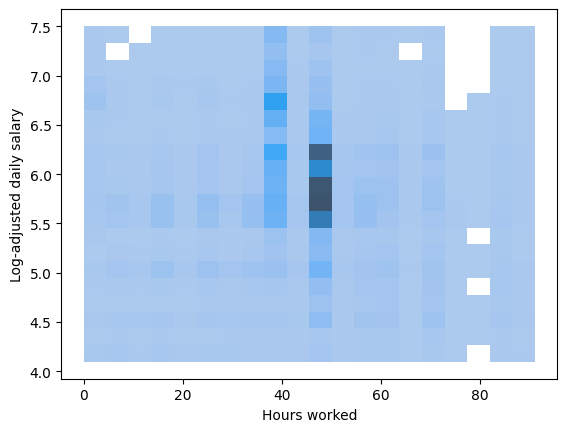

In [38]:
sns.histplot(data=df_no_mode_pbasic, x="PUFC19_PHOURS", y="log_PBASIC", bins=20)
plt.xlabel("Hours worked")
plt.ylabel("Log-adjusted daily salary")
plt.show()

## 5.1 Dividing the dataset into training, validation, and testing 

Now that we have cleaned the dataset as well as shown the trends within and between columns, we can then proceed to divide this dataset into three parts: the training set, validation set, and testing set. The division of the sets will be 60/20/20 respectively. 

In [39]:
# Drop NaN
df_no_mode_pbasic.dropna(inplace=True)

# set seed for randomizations
RANDOM_SEED = 2025

# Select only the columns that are going to be used
feature_columns = ['PUFREG', 'PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC18_PNWHRS', 'PUFC19_PHOURS']
df_selected = df_no_mode_pbasic[feature_columns]
df_y = df_no_mode_pbasic['PUFC25_PBASIC']

# Split first into training set and temporary set | 0.4 = 40% of the data to temporary set to be split later
X_training, temp_df, y_training, temp_df_y = train_test_split(df_selected, df_y, test_size=0.4, random_state = RANDOM_SEED)

# Split temp set to validation and test set | 0.5 indicating 50% split
X_validation, X_test, y_validation, y_test = train_test_split(temp_df, temp_df_y, test_size=0.5, random_state = RANDOM_SEED)

print(f"Training set size: X = {len(X_training)}, Y = {len(y_training)}")
print(f"Validation set size: X = {len(X_validation)}, Y = {len(y_validation)}")
print(f"Testing set size: X = {len(X_test)}, Y = {len(y_test)}")

Training set size: X = 19565, Y = 19565
Validation set size: X = 6522, Y = 6522
Testing set size: X = 6522, Y = 6522


To show that the data is representative of the population, we must compare through visualization the values within the sets and the whole dataset. To demonstrate, we make use of `PUFC25_PBASIC` to show their equality. 

<Figure size 1600x800 with 0 Axes>

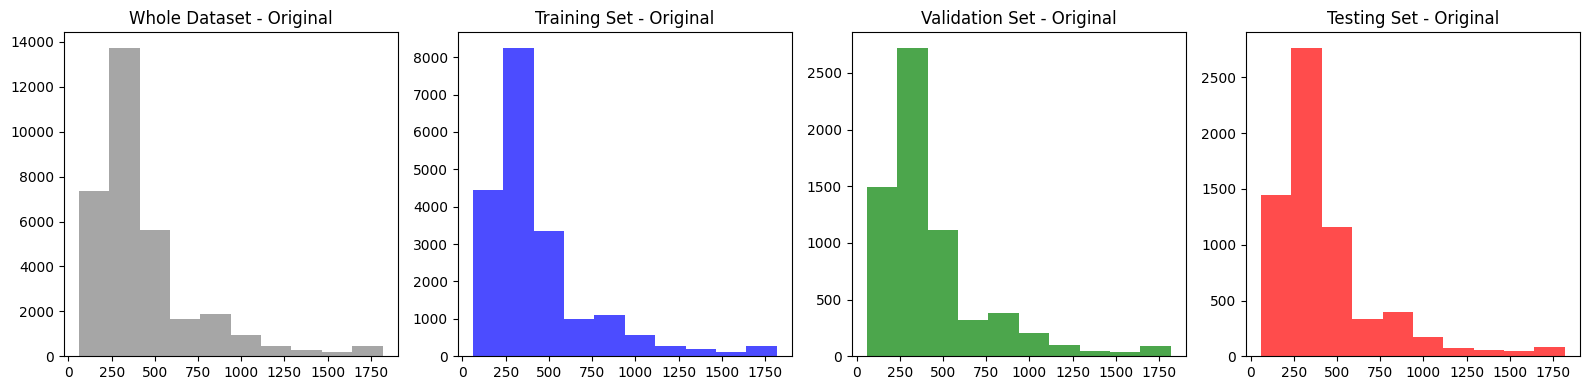

In [40]:
plt.figure(figsize=(16, 8))
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].hist(df_no_mode_pbasic['PUFC25_PBASIC'], bins=10, alpha=0.7, color='gray')
axs[0].set_title("Whole Dataset - Original")
axs[1].hist(y_training, bins=10, alpha=0.7, color='blue')
axs[1].set_title("Training Set - Original")
axs[2].hist(y_validation, bins=10, alpha=0.7, color='green')
axs[2].set_title("Validation Set - Original")
axs[3].hist(y_test, bins=10, alpha=0.7, color='red')
axs[3].set_title("Testing Set - Original")

plt.tight_layout()
plt.show()

We see how the graphs quite similar to each other. A summary of the sets can be seen below. There we can see that the means would vary which is an indication that they are different albeit still similar.

In [41]:
print("Training set: \n", y_training.describe())
print("\nValidation set: \n", y_validation.describe())
print("\nTest set: \n", y_test.describe())

Training set: 
 count    19565.000000
mean       423.417787
std        317.242492
min         60.000000
25%        250.000000
50%        349.000000
75%        482.000000
max       1818.000000
Name: PUFC25_PBASIC, dtype: float64

Validation set: 
 count    6522.000000
mean      424.901871
std       317.182497
min        60.000000
25%       250.000000
50%       346.000000
75%       500.000000
max      1818.000000
Name: PUFC25_PBASIC, dtype: float64

Test set: 
 count    6522.000000
mean      420.356639
std       306.651586
min        60.000000
25%       250.000000
50%       350.000000
75%       481.000000
max      1818.000000
Name: PUFC25_PBASIC, dtype: float64


The values for the mean for the continuous value of `PUFC25_PBASIC` feature is different between all the sets.

# Section 6. Initial model training

To reiterate, our objective is "Can we estimate a worker's daily wage based on their demographic, education, industry, and work hours?" This is Regression task, and to implement this task we chose three models namely: K-Nearest Neighbors, Linear Regression, Naive-Bayes.

## **6.1 K-Nearest Neighbors**

The first model to be implemented is K-Nearest Neighbors. To implement a regression task with K-Nearest Neighbors, we can import the `KNeighborsRegressor` Further information about this can be seen here [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [42]:
# Five models are instantiated here to test different K values
knn_m1 = KNeighborsRegressor(n_neighbors = 1)
knn_m3 = KNeighborsRegressor(n_neighbors = 3)
knn_m5 = KNeighborsRegressor(n_neighbors = 5)
knn_m7 = KNeighborsRegressor(n_neighbors = 7)
knn_m9 = KNeighborsRegressor(n_neighbors = 9)

We can train the model using the `fit()` function. 

In [43]:
knn_m1.fit(X_training, y_training)
knn_m3.fit(X_training, y_training)
knn_m5.fit(X_training, y_training)
knn_m7.fit(X_training, y_training)
knn_m9.fit(X_training, y_training)
pass

The training of a KNN model need not go through a validation set because the training simply stores the features and the labels. We can proceed to testing immediately.

In [44]:
m1_predict = knn_m1.predict(X_test)
m3_predict = knn_m3.predict(X_test)
m5_predict = knn_m5.predict(X_test)
m7_predict = knn_m7.predict(X_test)
m9_predict = knn_m9.predict(X_test)

print("Model K=1: ", m1_predict)
print("Model K=3: ", m3_predict)
print("Model K=5: ", m5_predict)
print("Model K=7: ", m7_predict)
print("Model K=9: ", m9_predict)

Model K=1:  [133. 481. 250. ... 400. 146. 318.]
Model K=3:  [151.         443.66666667 294.         ... 493.66666667 180.66666667
 380.66666667]
Model K=5:  [181.2 422.4 286.4 ... 446.2 170.  501.6]
Model K=7:  [197.14285714 384.14285714 274.85714286 ... 425.85714286 170.85714286
 492.85714286]
Model K=9:  [201.44444444 402.22222222 293.77777778 ... 438.11111111 167.11111111
 473.        ]


The predicted value should either be a discrete or continuous value. This is because regression in KNN gets the mean of the nearest neighbors. We can then use the `root_mean_squared_error` function of `sklearn.metrics` to see how accurate the different KNN regressor model is. RMSE is used for regression tasks. [Documentation](https://scikit-learn.org/stable/api/sklearn.metrics.html)

In [45]:
rmse_k1 = np.sqrt(mean_squared_error(y_test, m1_predict))
rmse_k3 = np.sqrt(mean_squared_error(y_test, m3_predict))
rmse_k5 = np.sqrt(mean_squared_error(y_test, m5_predict))
rmse_k7 = np.sqrt(mean_squared_error(y_test, m7_predict))
rmse_k9 = np.sqrt(mean_squared_error(y_test, m9_predict))

print("RMSE of Model K=1: ", rmse_k1)
print("RMSE of Model K=3: ", rmse_k3)
print("RMSE of Model K=5: ", rmse_k5)
print("RMSE of Model K=7: ", rmse_k7)
print("RMSE of Model K=9: ", rmse_k9)

RMSE of Model K=1:  307.9156627245832
RMSE of Model K=3:  257.4326410014267
RMSE of Model K=5:  245.12483172431732
RMSE of Model K=7:  240.96620516732878
RMSE of Model K=9:  239.52864713166562


Optimally, the RMSE should give a value closer to 0. The values above mean that, on average, the predictions are off by that amount. We can tune the hyperparameter K to lower this value.

The model is not optimized yet. Given that we can still work with different K values and find out which one gives the best performance. We can use the `GridSearchCV()` function of sklearn to automate this task. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [46]:


knn = KNeighborsRegressor()

# Testing K from 10 to 100
param_grid = {'n_neighbors': list(range(10, 100))} 

# GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_training, y_training)

# Display best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K: {best_k}")

Best K: 36


We can use the output to train and test our model to see if the RMSE is indeed lower than that of the earlier manual tries.

In [47]:
knn_mBest = KNeighborsRegressor(n_neighbors = best_k)
knn_mBest.fit(X_training, y_training)
mBest_predict = knn_mBest.predict(X_test)
rmse_kBest = np.sqrt(mean_squared_error(y_test, mBest_predict))

print("RMSE of Best K KNN Model: ", rmse_kBest)

RMSE of Best K KNN Model:  235.1279367567935


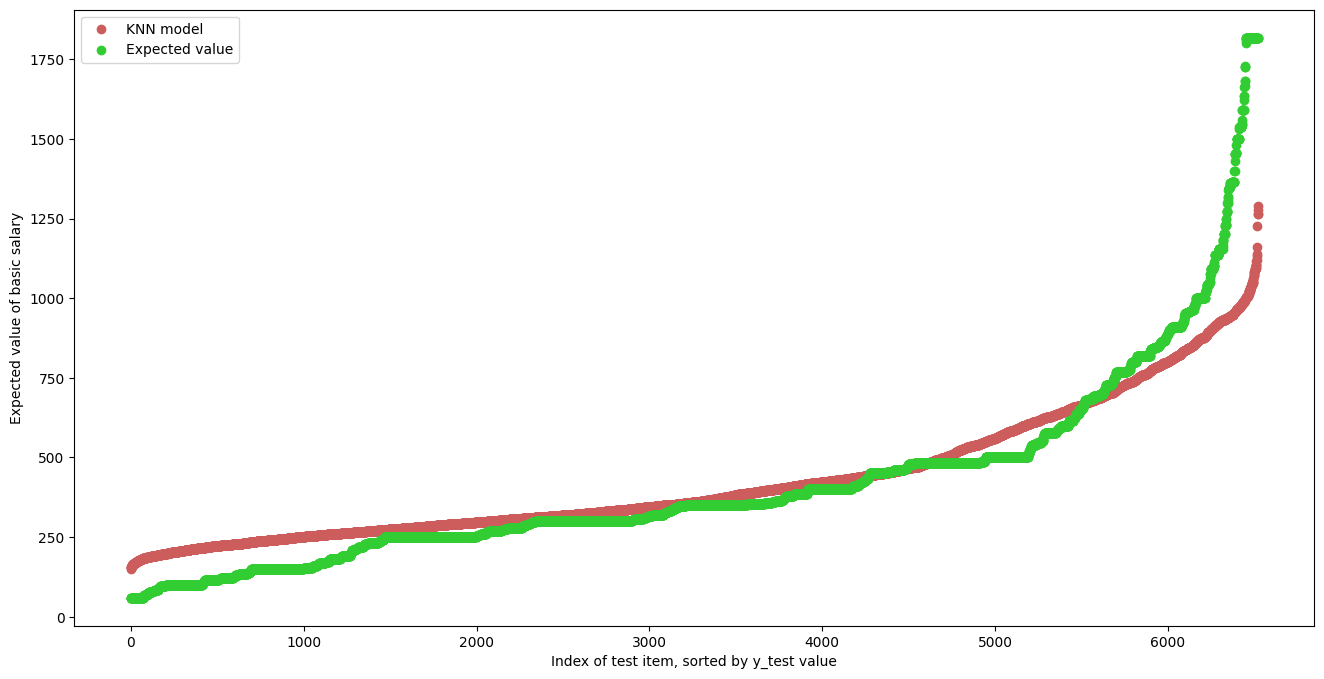

In [92]:
tempMerge = np.column_stack((mBest_predict, y_test))
tempMerge.sort(axis=0)
plt.figure(figsize=(16, 8))
plt.scatter(range(0,y_test.size), tempMerge[:,0], color="indianred")
plt.scatter(range(0,y_test.size), tempMerge[:,1], color="limegreen")
plt.xlabel("Index of test item, sorted by y_test value")
plt.ylabel("Expected value of basic salary")
plt.legend(["KNN model", "Expected value"])

plt.show()

## **6.2 Linear Regression**

The second model to be implemented is a linear regression model through the use of `sklearn.linear_model`. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

In [49]:


lin_models = {
    "linreg": LinearRegression(),
    "ridge": Ridge(alpha=100, random_state = RANDOM_SEED),
    "lasso": Lasso(alpha=100, random_state = RANDOM_SEED),
    "sgd_se": SGDRegressor(loss="squared_error", random_state = RANDOM_SEED),
    "sgd_h": SGDRegressor(loss="huber", random_state = RANDOM_SEED),
    "sgd_ei": SGDRegressor(loss="epsilon_insensitive", random_state = RANDOM_SEED),
}

Train the models using the `fit()` function

In [50]:
for m in lin_models:
    lin_models[m].fit(X_training, y_training)

Next, we gather the RMSE of the model on the training and test sets.

In [51]:
pred_test = {}
for m in lin_models:
    pred_train = lin_models[m].predict(X_training)
    rmse = np.sqrt(mean_squared_error(y_training, pred_train))
    print(f"RMSE of model {m} on training: {rmse}")
print()
for i, m in enumerate(lin_models):
    pred_test[m] = lin_models[m].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test[m]))
    print(f"RMSE of model {m} on test: {rmse}")

RMSE of model linreg on training: 260.5286137018999
RMSE of model ridge on training: 260.5291988015417
RMSE of model lasso on training: 264.4926275564309
RMSE of model sgd_se on training: 265.67554214692376
RMSE of model sgd_h on training: 273.5936967712033
RMSE of model sgd_ei on training: 274.23979358237807

RMSE of model linreg on test: 253.3602838870661
RMSE of model ridge on test: 253.36095300388067
RMSE of model lasso on test: 256.73924110945376
RMSE of model sgd_se on test: 257.25323418611157
RMSE of model sgd_h on test: 264.53020269649073
RMSE of model sgd_ei on test: 265.23403919947623


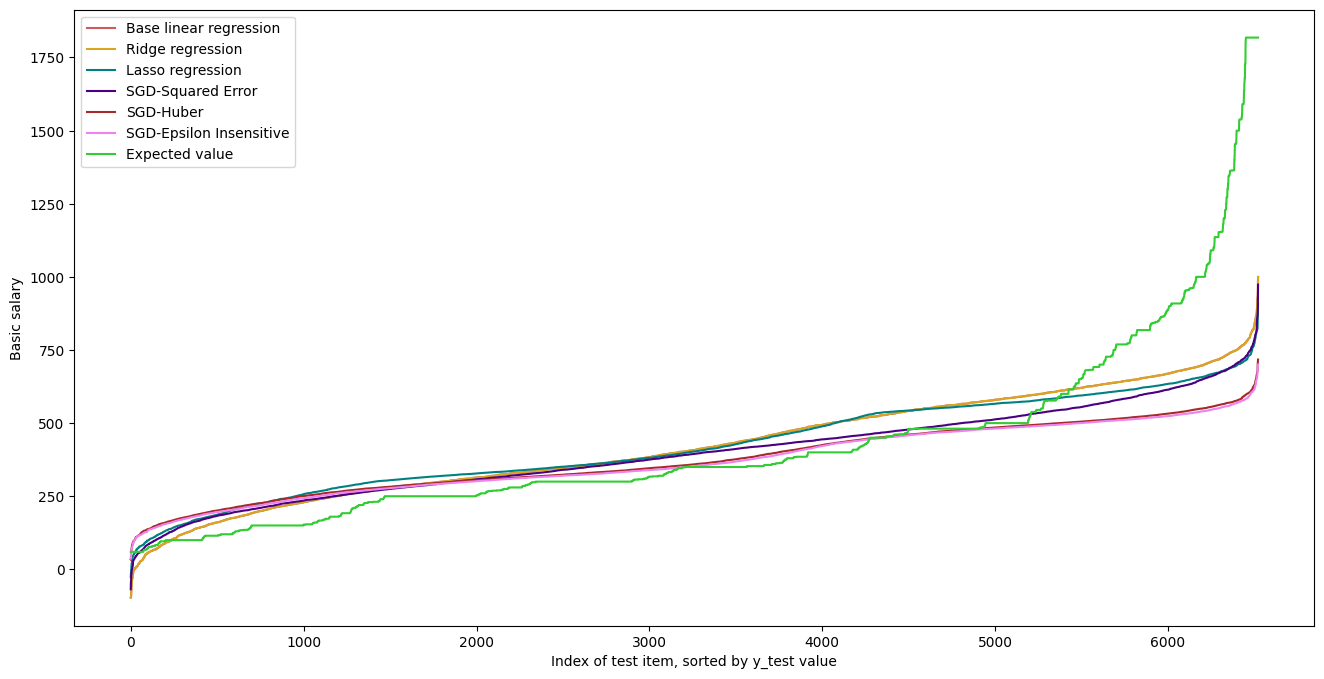

In [52]:
tempMerge = np.column_stack((pred_test["linreg"], pred_test["ridge"], pred_test["lasso"], pred_test["sgd_se"], pred_test["sgd_h"], pred_test["sgd_ei"], y_test))
tempMerge.sort(axis=0)
plt.figure(figsize=(16, 8))
plt.plot(tempMerge[:,0], color="indianred")
plt.plot(tempMerge[:,1], color="goldenrod")
plt.plot(tempMerge[:,2], color="teal")
plt.plot(tempMerge[:,3], color="indigo")
plt.plot(tempMerge[:,4], color="brown")
plt.plot(tempMerge[:,5], color="violet")
plt.plot(tempMerge[:,6], color="limegreen")
plt.xlabel("Index of test item, sorted by y_test value")
plt.ylabel("Basic salary")
plt.legend(["Base linear regression", "Ridge regression", "Lasso regression", "SGD-Squared Error", "SGD-Huber", "SGD-Epsilon Insensitive", "Expected value"])

plt.show()

Ultimately, the above test shows that the best performing linear regression models that we can use is the base `LinearRegression` model, with the ridge regularized regression model coming second.

Through hyperparameter tuning, we can see which hyperparameters suit the different linear regression models. Here we make use of GridSearchCV again to see how different hyperparameters perform.

In [53]:
lin_models = {
    "linreg": LinearRegression(),
    "ridge": Ridge(alpha=100, random_state = RANDOM_SEED),
    "lasso": Lasso(alpha=100, random_state = RANDOM_SEED),
    "sgd_se": SGDRegressor(loss="squared_error", random_state = RANDOM_SEED),
    "sgd_h": SGDRegressor(loss="huber", random_state = RANDOM_SEED),
    "sgd_ei": SGDRegressor(loss="epsilon_insensitive", random_state = RANDOM_SEED),
}


# Test different hyperparameters here, add more if needed
param_grid = {
    "ridge": {"alpha": [0.1, 1, 10, 100]},
    "lasso": {"alpha": [0.1, 1, 10, 100]},
    "sgd_se": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
    "sgd_h": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
    "sgd_ei": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
}

In [54]:
# The code below is similar to the GridSearch implemented in KNN Regressor. 
best_models = {}
for name, model in lin_models.items():
    if name in param_grid:  
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_training, y_training)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_training, y_training)  
        best_models[name] = model

In [55]:
# Display the best hyperparameters, based on the param_grid. 
for name, model in best_models.items():
    if name in param_grid:
        best_params = {param: model.get_params()[param] for param in param_grid[name]}
        print(f"Best parameters for {name}: {best_params}")
        print()

Best parameters for ridge: {'alpha': 10}

Best parameters for lasso: {'alpha': 0.1}

Best parameters for sgd_se: {'alpha': 0.01, 'max_iter': 1000, 'eta0': 0.01}

Best parameters for sgd_h: {'alpha': 0.0001, 'max_iter': 1000, 'eta0': 1}

Best parameters for sgd_ei: {'alpha': 0.0001, 'max_iter': 1000, 'eta0': 0.1}



Test the model using the earlier code.

In [56]:
pred_test = {}
for m in best_models: # best_models contain the best hyperparameters 
    pred_train = best_models[m].predict(X_training)
    rmse = np.sqrt(mean_squared_error(y_training, pred_train))
    print(f"RMSE of model {m} on training: {rmse}")
print()
for i, m in enumerate(best_models):
    pred_test[m] = best_models[m].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test[m]))
    print(f"RMSE of model {m} on test: {rmse}")

RMSE of model linreg on training: 260.5286137018999
RMSE of model ridge on training: 260.52861979072
RMSE of model lasso on training: 260.5287218999178
RMSE of model sgd_se on training: 266.1956712342839
RMSE of model sgd_h on training: 267.46149889804127
RMSE of model sgd_ei on training: 272.9902617033481

RMSE of model linreg on test: 253.3602838870661
RMSE of model ridge on test: 253.36030025486303
RMSE of model lasso on test: 253.35946367981902
RMSE of model sgd_se on test: 257.6770663235033
RMSE of model sgd_h on test: 258.7250289228712
RMSE of model sgd_ei on test: 263.8104464895868


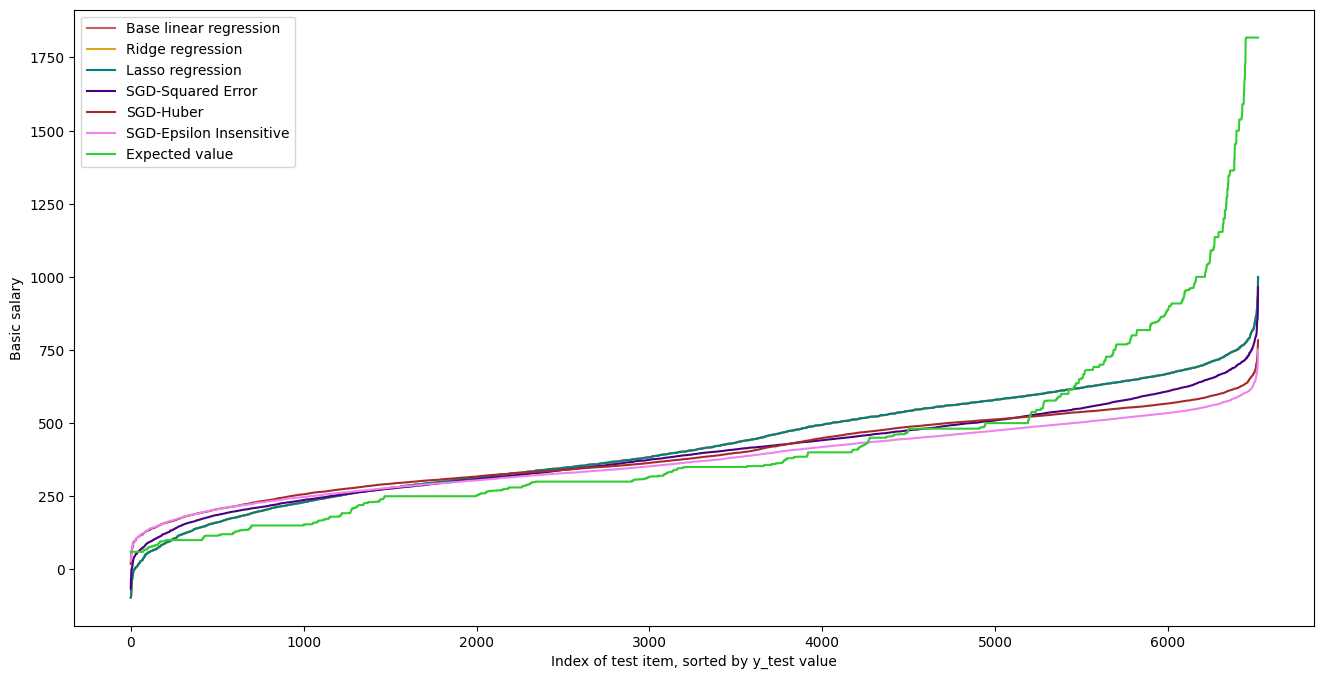

In [57]:
tempMerge = np.column_stack((pred_test["linreg"], pred_test["ridge"], pred_test["lasso"], pred_test["sgd_se"], pred_test["sgd_h"], pred_test["sgd_ei"], y_test))
tempMerge.sort(axis=0)
plt.figure(figsize=(16, 8))
plt.plot(tempMerge[:,0], color="indianred")
plt.plot(tempMerge[:,1], color="goldenrod")
plt.plot(tempMerge[:,2], color="teal")
plt.plot(tempMerge[:,3], color="indigo")
plt.plot(tempMerge[:,4], color="brown")
plt.plot(tempMerge[:,5], color="violet")
plt.plot(tempMerge[:,6], color="limegreen")
plt.xlabel("Index of test item, sorted by y_test value")
plt.ylabel("Basic salary")
plt.legend(["Base linear regression", "Ridge regression", "Lasso regression", "SGD-Squared Error", "SGD-Huber", "SGD-Epsilon Insensitive", "Expected value"])

plt.show()

## 6.3 Naive Bayes

The last algorithm to be tested in this project is the **Naïve Bayes** algorithm. Scikit-learn ([documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)) provides various implementations of this algorithm, such as `GaussianNB`, `MultinomialNB`, and `ComplementNB`. The library also contains `BernoulliNB` and `CategoricalNB`, which are both more suited for categorical data and shall be ignored for our usecase.

We should test each of these implementations against each other to figure out the best one to run in this dataset. Both the Multinomial and Complement NB models have also been loaded with `alpha` smoothing hyperparameters of 10 and 25.

In [93]:
# Load the models
nb_models = {
    "gnb": GaussianNB(),
    "mnb1": MultinomialNB(alpha = 1),
    "mnb25": MultinomialNB(alpha = 25),
    "mnb100": MultinomialNB(alpha = 100),
    "cnb1": ComplementNB(alpha = 1),
    "cnb25": ComplementNB(alpha = 25),
    "cnb100": ComplementNB(alpha = 100),
}

# Fit data
for m in nb_models:
    nb_models[m].fit(X_training, y_training)

In [94]:
# get RMSE on training and testing
for m in nb_models:
    pred_train = nb_models[m].predict(X_training)
    rmse = np.sqrt(mean_squared_error(y_training, pred_train))
    print(f"RMSE of model {m} on training: {rmse}")

print()

for m in nb_models:
    pred_test[m] = nb_models[m].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test[m]))
    print(f"RMSE of model {m} on testing: {rmse}")

RMSE of model gnb on training: 353.93538829156506
RMSE of model mnb1 on training: 371.9739680621767
RMSE of model mnb25 on training: 420.97192491188457
RMSE of model mnb100 on training: 386.59530080386253
RMSE of model cnb1 on training: 378.69129648329704
RMSE of model cnb25 on training: 381.11046744697114
RMSE of model cnb100 on training: 388.8440080041033

RMSE of model gnb on testing: 354.34152708456384
RMSE of model mnb1 on testing: 371.7141154498374
RMSE of model mnb25 on testing: 415.337725900587
RMSE of model mnb100 on testing: 379.10958215752777
RMSE of model cnb1 on testing: 370.5547175268264
RMSE of model cnb25 on testing: 372.6667037641672
RMSE of model cnb100 on testing: 376.3484143027248


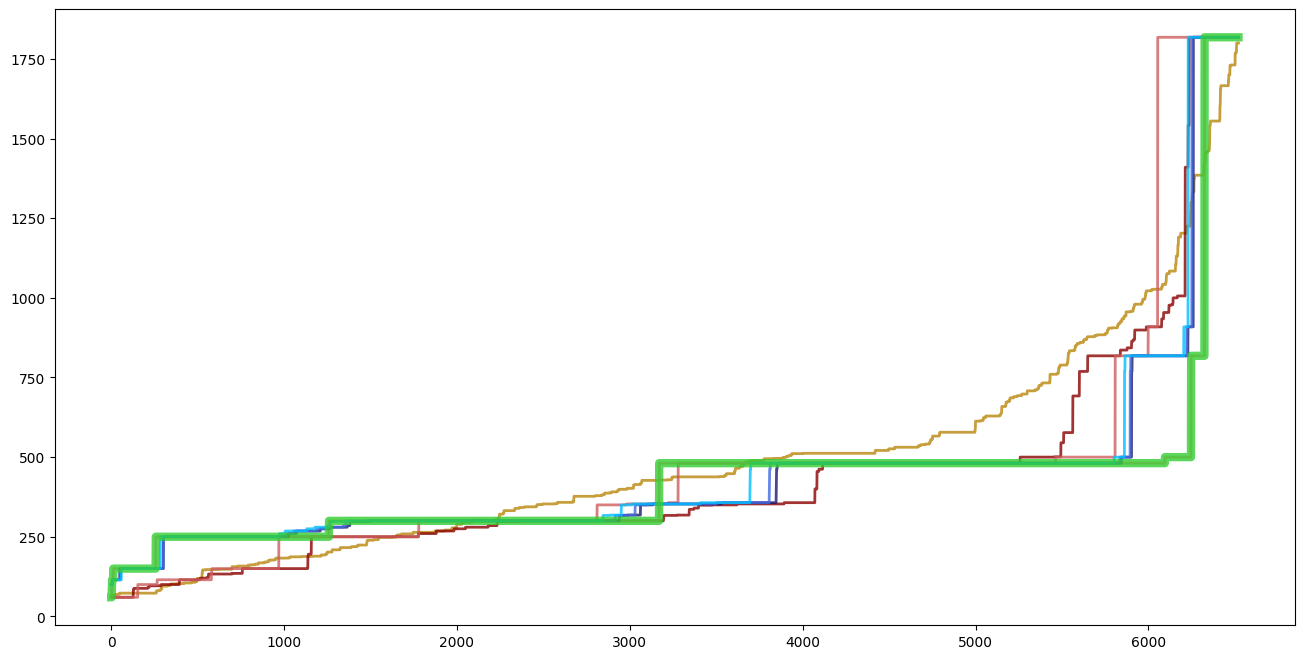

In [95]:
tempMerge = np.column_stack((
    pred_test["gnb"], pred_test["mnb1"], pred_test["mnb25"], pred_test["mnb100"],
    pred_test["cnb1"], pred_test["cnb25"], pred_test["cnb100"], y_test
))

tempMerge.sort(axis=0)
plt.figure(figsize=(16, 8))

labelColors = ["darkgoldenrod", "darkred", "indianred", "salmon", "midnightblue", "royalblue", "deepskyblue"]
for i, m in enumerate(nb_models):
    plt.plot(tempMerge[:, i], color=labelColors[i], linewidth = 2, alpha=0.8)

plt.plot(tempMerge[:, 3], color="limegreen", linewidth=6, alpha=0.8)

plt.show()

From the above plot and the provided RMSEs of each of the tested model, we can see that the best performing model here is the Gaussian Naive Bayes model, visually displayed above in red. As can be seen in this plot, the Gaussian NB model performs well when dealing with smaller numbers which makes up the bulk of the dataset, but has a harder time predicting larger values and tends to predict higher than what the actual value is.

Compared to it, Complement NB and Multinomial NB are more prone to generalizations, which can be seen by the steps in their graphs above. Both models generalize chunks of an area and predict the same values for a given range, perhaps due to similar factors for them, and thus they tend to be more inaccurate.

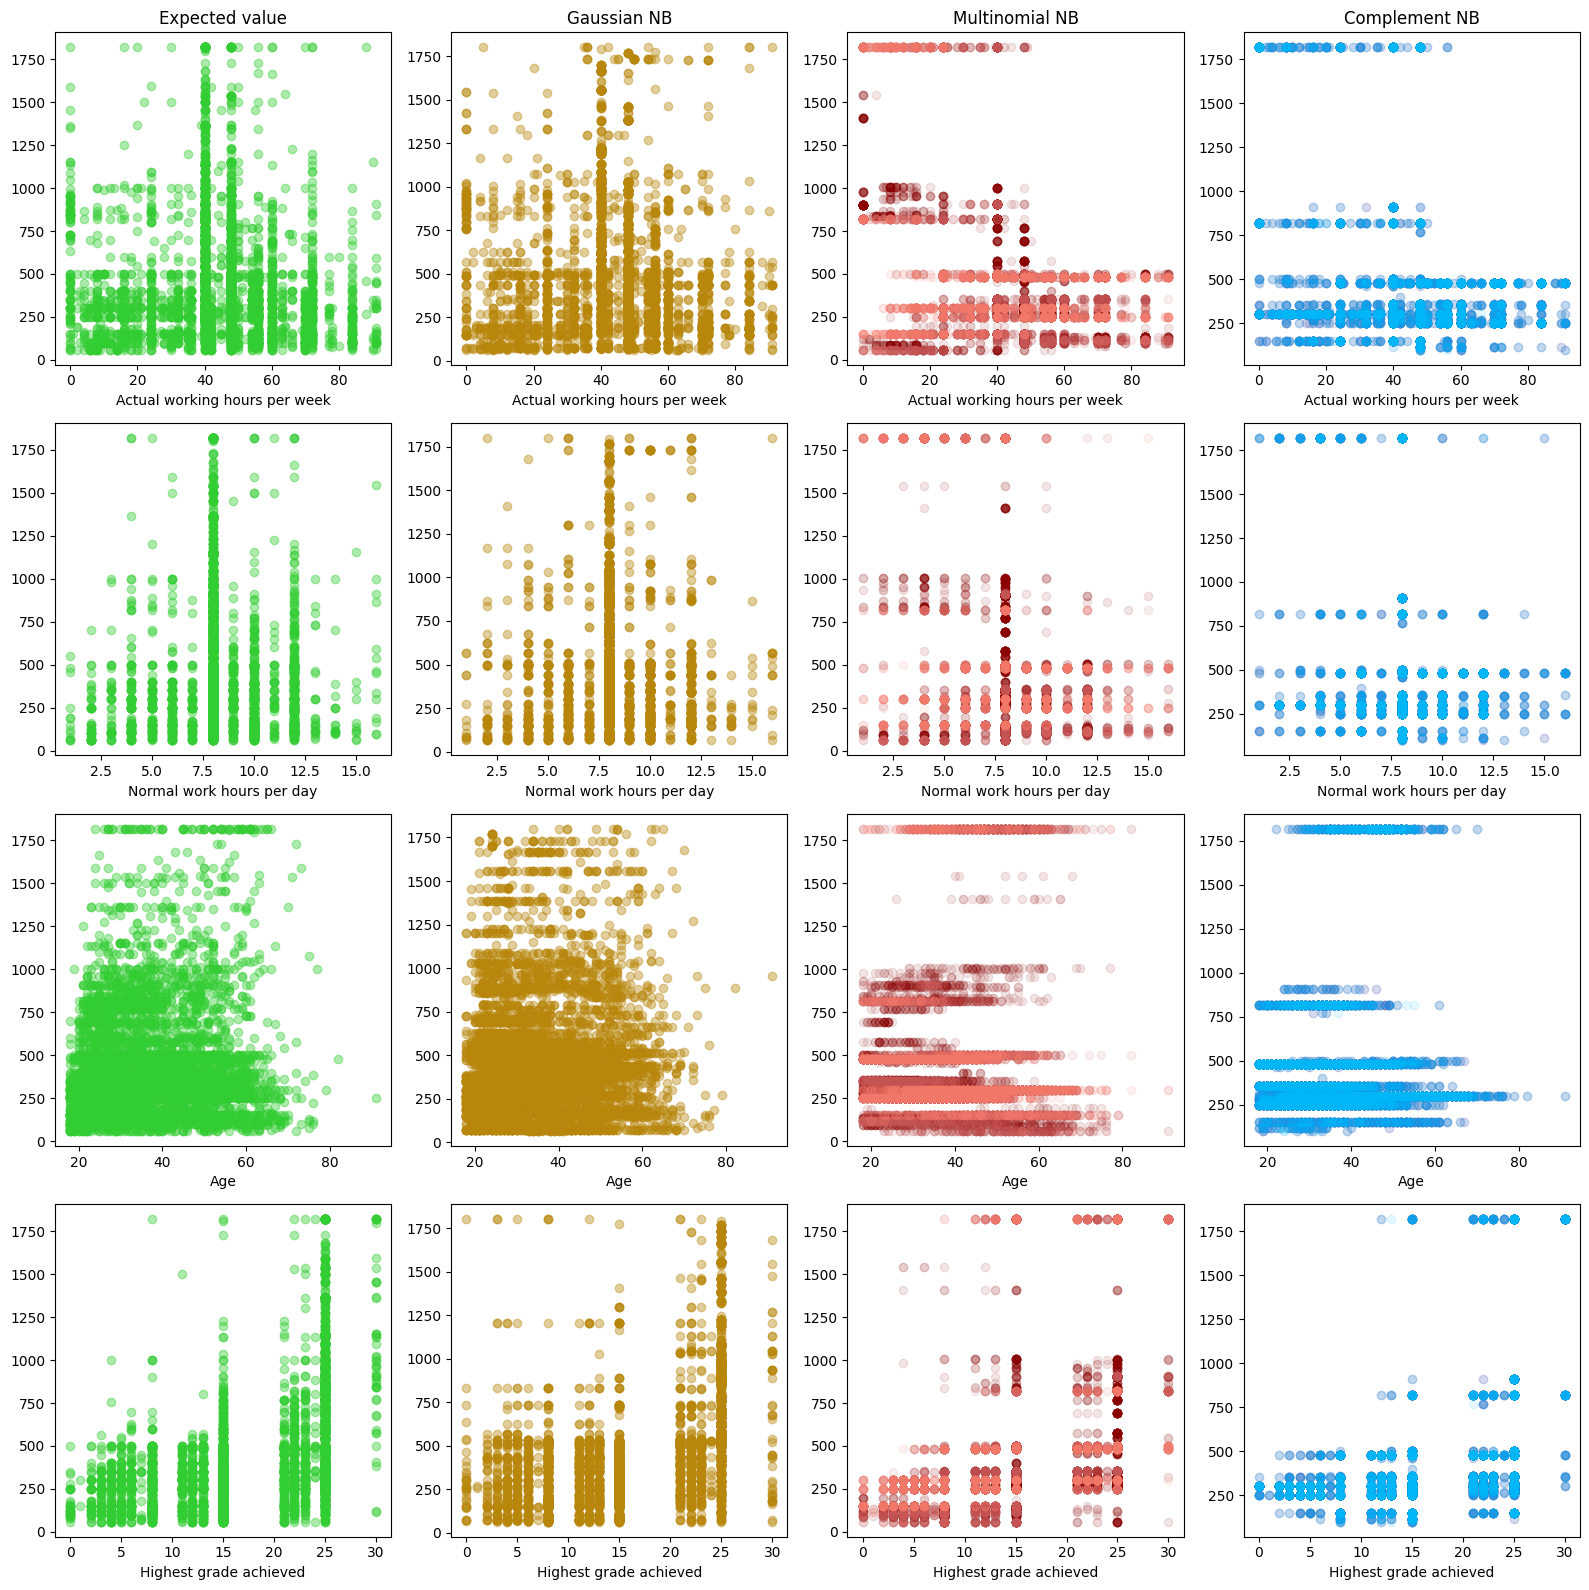

In [96]:
labelColors = ["darkgoldenrod", "darkred", "indianred", "salmon", "midnightblue", "royalblue", "deepskyblue"]

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
human_readable_labels = ["Actual working hours per week", "Normal work hours per day", "Age", "Highest grade achieved"]
for i, feat in enumerate(["PUFC19_PHOURS", "PUFC18_PNWHRS", "PUFC05_AGE", "PUFC07_GRADE"]):
    axs[i, 0].scatter(X_test[feat], y_test, color="limegreen", alpha=0.4)
    axs[i, 1].scatter(X_test[feat], pred_test["gnb"], color=labelColors[0], alpha=0.4)
    axs[i, 2].scatter(X_test[feat], pred_test["mnb1"], color=labelColors[1], alpha=0.1)
    axs[i, 2].scatter(X_test[feat], pred_test["mnb25"], color=labelColors[2], alpha=0.1)
    axs[i, 2].scatter(X_test[feat], pred_test["mnb100"], color=labelColors[3], alpha=0.1)
    axs[i, 3].scatter(X_test[feat], pred_test["cnb1"], color=labelColors[4], alpha=0.1)
    axs[i, 3].scatter(X_test[feat], pred_test["cnb25"], color=labelColors[5], alpha=0.1)
    axs[i, 3].scatter(X_test[feat], pred_test["cnb100"], color=labelColors[6], alpha=0.1)
    axs[i, 0].set_xlabel(f"{human_readable_labels[i]}")
    axs[i, 1].set_xlabel(f"{human_readable_labels[i]}")
    axs[i, 2].set_xlabel(f"{human_readable_labels[i]}")
    axs[i, 3].set_xlabel(f"{human_readable_labels[i]}")

    #for j, m in enumerate(nb_models):
    #    axs[j+1, i].scatter(X_test[feat], pred_test[m], color=labelColors[j], alpha=0.4)
        
axs[0,0].set_title("Expected value")
axs[0,1].set_title("Gaussian NB")
axs[0,2].set_title("Multinomial NB")
axs[0,3].set_title("Complement NB")

plt.tight_layout()
plt.show()

These plots show each of the models' predictions when it is given a certain value in weekly working hours, daily expected working hours, age, and grade respectively. One would be able to quickly notice the shape of these plots: the Gaussian NB model's predictions are roughly similar to ground truth, and although the Multinomial NB model is to an extent able to catch some of the shape, the Complement NB model is very prone to generalizations with how most of its predictions are clustered around similar values in the y-axis of its graphs.

In addition, we can see with the above two plots that the `alpha` hyperparameters of Multinomial and Complement NB do not meaningfully impact the way that they predict values, much less make it predict better than Gaussian NB which does not have a value to be compared to.

Therefore, we can say that the ideal Naive Bayes model for use for prediction of values is the **Gaussian Naive Bayes** model.

In [97]:
nb_model_best = nb_models["gnb"]

# Section 7. Error analysis

To reiterate, our objective is "Can we estimate a worker's daily wage based on their demographic, education, industry, and work hours?" This is a Regression task, and to implement this task we chose three models namely: K-Nearest Neighbors, Linear Regression, Naive-Bayes.

### 7.1 K-Nearest neighbors
In order to evalue the performance of the model, the root mean sqaured error is calculated. When it comes to evluating the overall raw performance of the model, a lower rmse will lead to better performance. As done previously, the rmse of best model is calculated.


In [63]:
print(rmse_kBest)

235.1279367567935


An rmse of 231 implies that the predicted daily salary is off by around 231 pesos.

Another metric that can be used to evalute the performance of this model is by getting the R-Squared, which measures how much of the variance actually captures the model. A number closer to 1 would result to better performance.


In [91]:
print("R-Squared Score: ", r2_score(y_test, mBest_predict))

R-Squared Score:  0.41199011187013734


Based on the R-Squared score, the performance of the model can still be further improved. A score of 0.41 would imply that around 41% of the variability can be explained by the model, while the remaining 59% may be due to instances with high error or the lack of features taken into account.

In order to further improve the performance of the model, instances that produce high error within the data should be found. To do this, the difference between the predicted value, and the actual value will be calculated using the np.abs() function.


In [65]:
# Calculate the absolute error
#error = abs(y_test - mBest_predict)

# Define a threshold for high error
threshold = 0.50  # 20% - can be manually adjusted

# Create a new dataframe with instances where error exceeds the threshold
error_instances = X_test.merge(y_test, how="inner", left_index=True, right_index=True)
error_instances = error_instances.reset_index().merge(pd.Series(mBest_predict, name="predicted"), how="inner", left_index=True, right_index=True)
error_instances['error'] = abs(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
error_instances['overunder'] = np.sign(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
high_error_instances = error_instances[error_instances["error"] > error_instances["predicted"] * threshold]
low_error_instances = error_instances[error_instances["error"] <= error_instances["predicted"] * threshold]
error_instances_knn = error_instances.copy()

To visualize these data points, let us plot these and see where the model fails here.

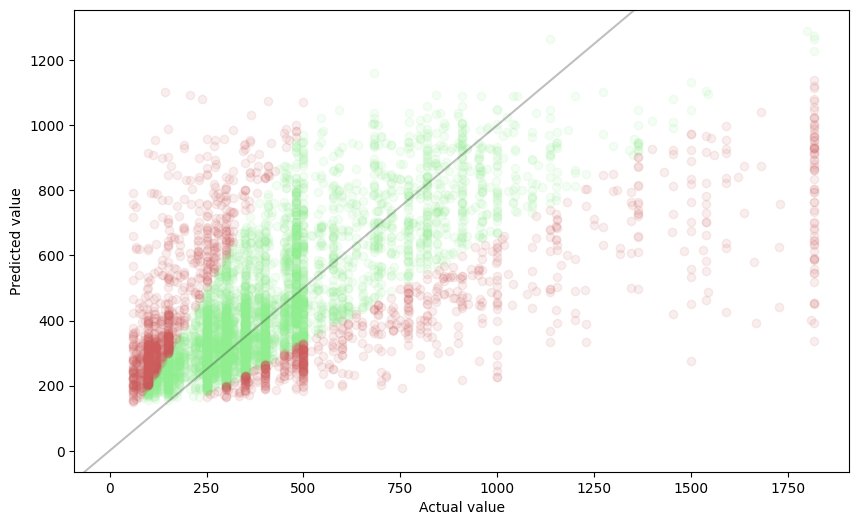

In [66]:
plt.figure(figsize=(10, 6))
plt.axline([0,0], [1,1], color="black", alpha=0.25)
plt.scatter(low_error_instances["PUFC25_PBASIC"], low_error_instances["predicted"], alpha=0.1, color="lightgreen")
plt.scatter(high_error_instances["PUFC25_PBASIC"], high_error_instances["predicted"], alpha=0.1, color="indianred")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

As can be seen in the above plot with the density of points around `x = 125` show that with smaller salaries, the model is more likely to overshoot by about 100 than undershoot. However, with larger salaries, it is instead much likely to undershoot and predict less than it should. This is backed up by the fact that this model has not predicted any value above `1254.64`, much lower than the highest salary present in the dataset `1818`.

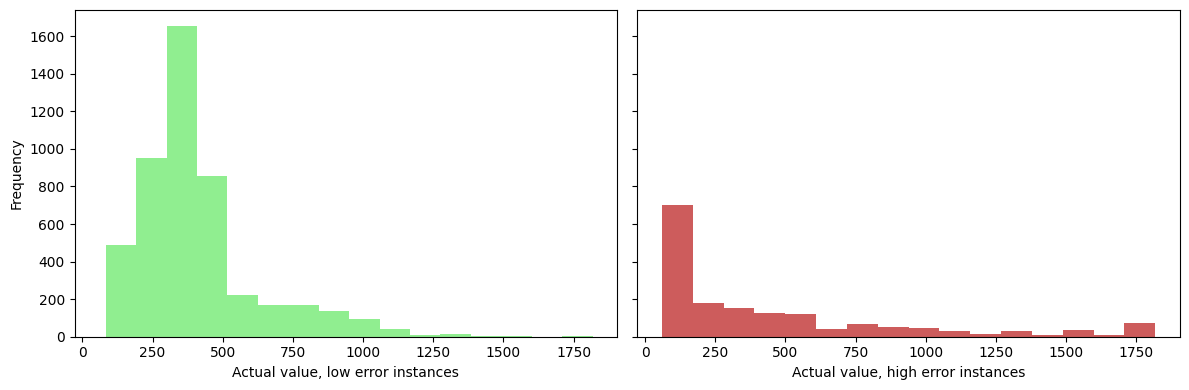

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex="all", sharey="all")
axs[0].hist(low_error_instances["PUFC25_PBASIC"], color="lightgreen", bins=16)
axs[1].hist(high_error_instances["PUFC25_PBASIC"], color="indianred", bins=16)
axs[0].set_xlabel("Actual value, low error instances")
axs[1].set_xlabel("Actual value, high error instances")
axs[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

The above plot shows at which areas the model is most successful and least successful at predicting. We can see that the model is much more likely to predict correctly within the mean area, but less likely the more that it strays from it. 

However, do certain features affect our model? Let us see: below

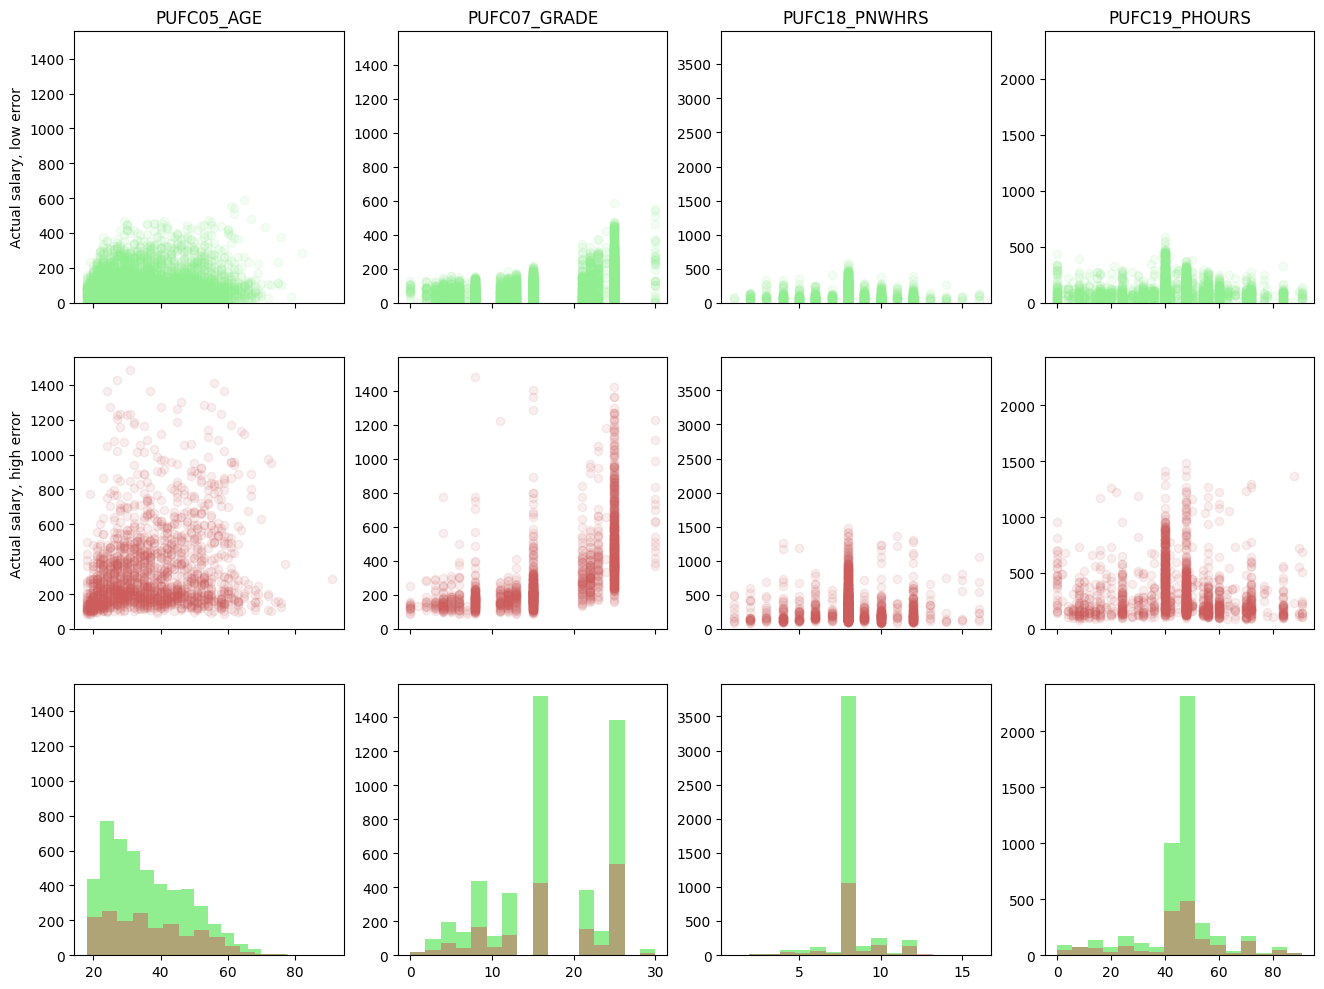

In [68]:
fig, axs = plt.subplots(3,4, figsize=(16,12), sharex="col", sharey="col")
axs[0,0].set_ylabel("Actual salary, low error")
axs[1,0].set_ylabel("Actual salary, high error")
for i, feat in enumerate(["PUFC05_AGE", "PUFC07_GRADE", "PUFC18_PNWHRS", "PUFC19_PHOURS"]):
    axs[0,i].set_title(feat)
    axs[0,i].scatter(low_error_instances[feat], low_error_instances["error"], color="lightgreen", alpha=0.1)
    axs[1,i].scatter(high_error_instances[feat], high_error_instances["error"], color="indianred", alpha=0.1)
    axs[2,i].hist(low_error_instances[feat], color="lightgreen", bins=16)
    axs[2,i].hist(high_error_instances[feat], color="indianred", bins=16, alpha=0.5)

plt.show()

When we compare the results of these plots and the one above, we can notice that the model is incapable of predicting high salaries in general regardless of the data that it receives. However, we should take note of how the model actually works behind the scenes: as a k-nearest neighbor model, it is more likely to understand values that are close by. This dataset in particlar has a lot of values that result in lower values of salaries, so the model is thus more likely to predict lower salaries in general.

### 7.2 Linear Regression
Given the results above, we should also try seeing if linear regression suffers from the same issues. As such, we will be reusing the first two plots we created above:

In [69]:
# Create a new dataframe with instances where error exceeds the threshold
error_instances = X_test.merge(y_test, how="inner", left_index=True, right_index=True)
error_instances = error_instances.reset_index().merge(pd.Series(pred_test["linreg"], name="predicted"), how="inner", left_index=True, right_index=True)
error_instances['error'] = abs(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
error_instances['overunder'] = np.sign(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
high_error_instances = error_instances[error_instances["error"] > error_instances["predicted"] * threshold]
low_error_instances = error_instances[error_instances["error"] <= error_instances["predicted"] * threshold]
error_instances_linreg = error_instances.copy()

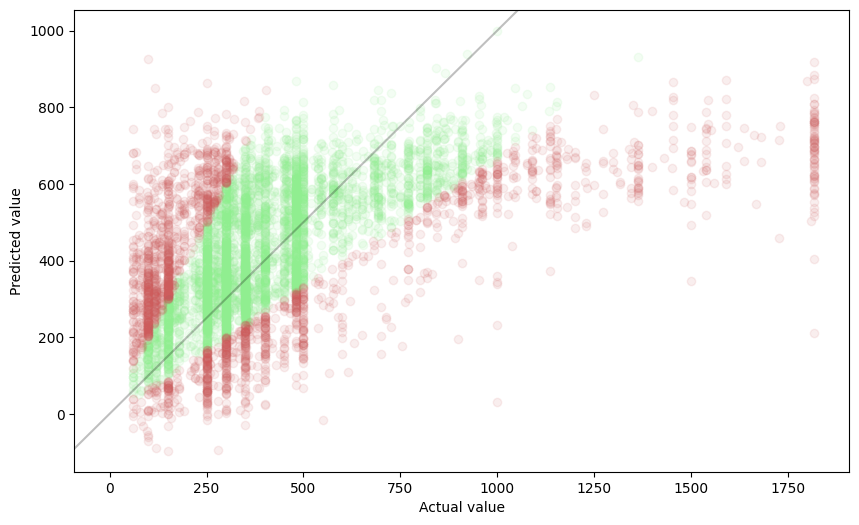

In [70]:
plt.figure(figsize=(10, 6))
plt.axline([0,0], [1,1], color="black", alpha=0.25)
plt.scatter(low_error_instances["PUFC25_PBASIC"], low_error_instances["predicted"], alpha=0.1, color="lightgreen")
plt.scatter(high_error_instances["PUFC25_PBASIC"], high_error_instances["predicted"], alpha=0.1, color="indianred")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

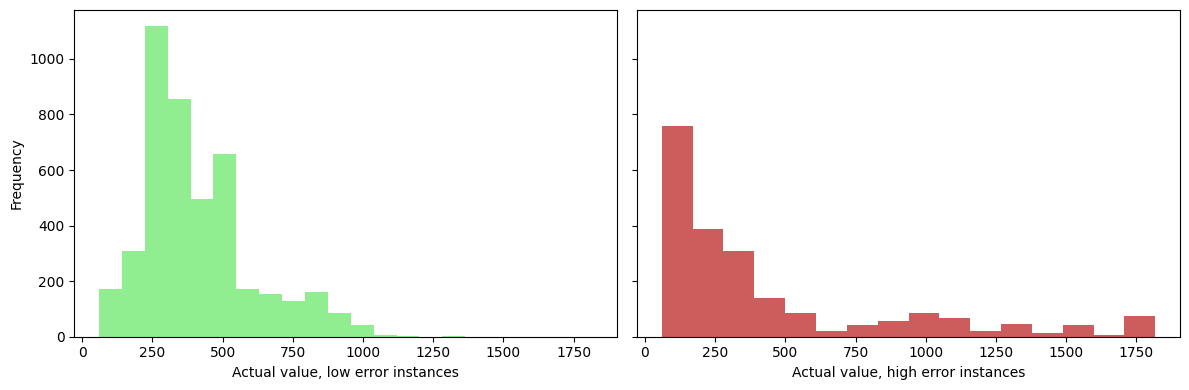

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex="all", sharey="all")
axs[0].hist(low_error_instances["PUFC25_PBASIC"], color="lightgreen", bins=16)
axs[1].hist(high_error_instances["PUFC25_PBASIC"], color="indianred", bins=16)
axs[0].set_xlabel("Actual value, low error instances")
axs[1].set_xlabel("Actual value, high error instances")
axs[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

As can be seen here, the performance of this model is generally similar to that of kNN, in that it tends to get the salary values around the mean more accurately but is less capable of predicting much higher values. However, Linear Regression is less accurate than kNN, which is further backed up by its RMSE score as seen above.

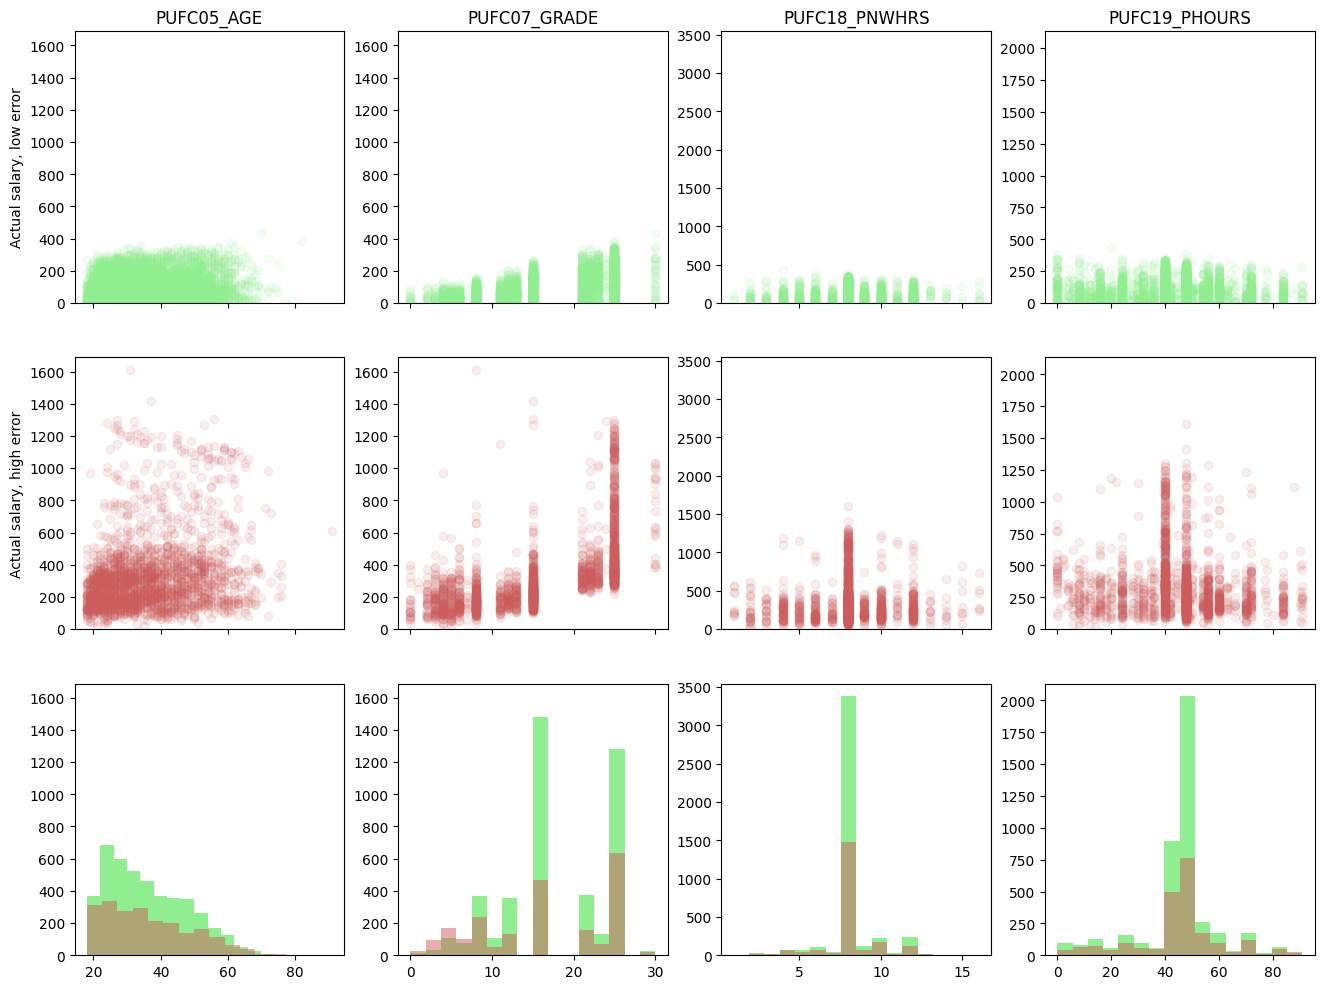

In [72]:
fig, axs = plt.subplots(3,4, figsize=(16,12), sharex="col", sharey="col")
axs[0,0].set_ylabel("Actual salary, low error")
axs[1,0].set_ylabel("Actual salary, high error")
for i, feat in enumerate(["PUFC05_AGE", "PUFC07_GRADE", "PUFC18_PNWHRS", "PUFC19_PHOURS"]):
    axs[0,i].set_title(feat)
    axs[0,i].scatter(low_error_instances[feat], low_error_instances["error"], color="lightgreen", alpha=0.1)
    axs[1,i].scatter(high_error_instances[feat], high_error_instances["error"], color="indianred", alpha=0.1)
    axs[2,i].hist(low_error_instances[feat], color="lightgreen", bins=16)
    axs[2,i].hist(high_error_instances[feat], color="indianred", bins=16, alpha=0.5)

plt.show()

Again, checking features does not really provide large clues on which features in particular this model is particularly struggling with; Linear Regression generally suffers from the same issues that are holding back kNN as well, that being the lack of training data for older people and an inability to predict high salary values.

### 7.3 Naive Bayes
Finally, let's look over plots for the Naive Bayes model's performance.

In [73]:
# Create a new dataframe with instances where error exceeds the threshold
error_instances = X_test.merge(y_test, how="inner", left_index=True, right_index=True)
error_instances = error_instances.reset_index().merge(pd.Series(pred_test["gnb"], name="predicted"), how="inner", left_index=True, right_index=True)
error_instances['error'] = abs(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
error_instances['overunder'] = np.sign(error_instances["PUFC25_PBASIC"] - error_instances["predicted"])
high_error_instances = error_instances[error_instances["error"] > error_instances["predicted"] * threshold]
low_error_instances = error_instances[error_instances["error"] <= error_instances["predicted"] * threshold]
error_instances_nb = error_instances.copy()

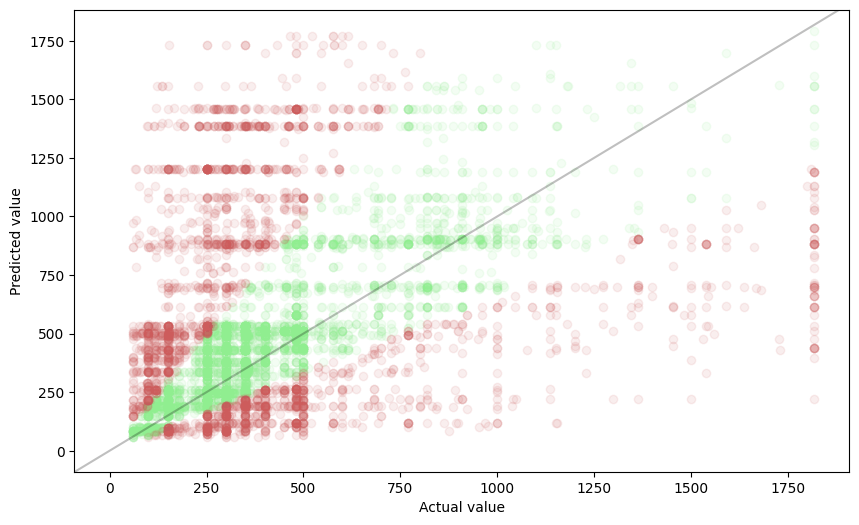

In [74]:
plt.figure(figsize=(10, 6))
plt.axline([0,0], [1,1], color="black", alpha=0.25)
plt.scatter(low_error_instances["PUFC25_PBASIC"], low_error_instances["predicted"], alpha=0.1, color="lightgreen")
plt.scatter(high_error_instances["PUFC25_PBASIC"], high_error_instances["predicted"], alpha=0.1, color="indianred")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

Immediately, we can notice the differences between this model and the other two that we have used. For one, the values that this model can predict now stretches up to about `1,750`, something hinted by the performance comparison plot that we have created earlier for each of the individual Naive Bayes models we tested. However, another thing that can be noticed is the grid-like pattern of the results: Naive Bayes may tend to group together items with similar characteristics which leads to it outputting the same result for them even if they are slightly different.

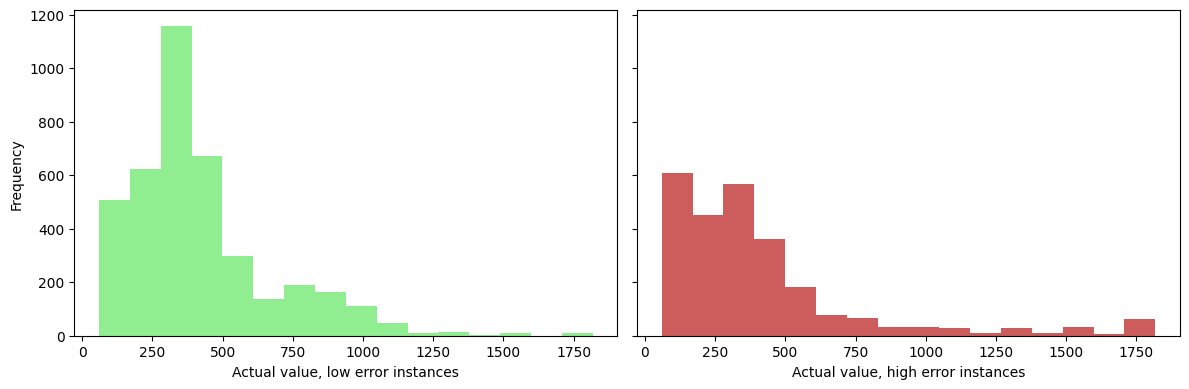

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex="all", sharey="all")
axs[0].hist(low_error_instances["PUFC25_PBASIC"], color="lightgreen", bins=16)
axs[1].hist(high_error_instances["PUFC25_PBASIC"], color="indianred", bins=16)
axs[0].set_xlabel("Actual value, low error instances")
axs[1].set_xlabel("Actual value, high error instances")
axs[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

Performance-wise however, this model is much less accurate than either of the two models that we have used before, with the `frequency` axis only stretching up to around `1000` in these plots.

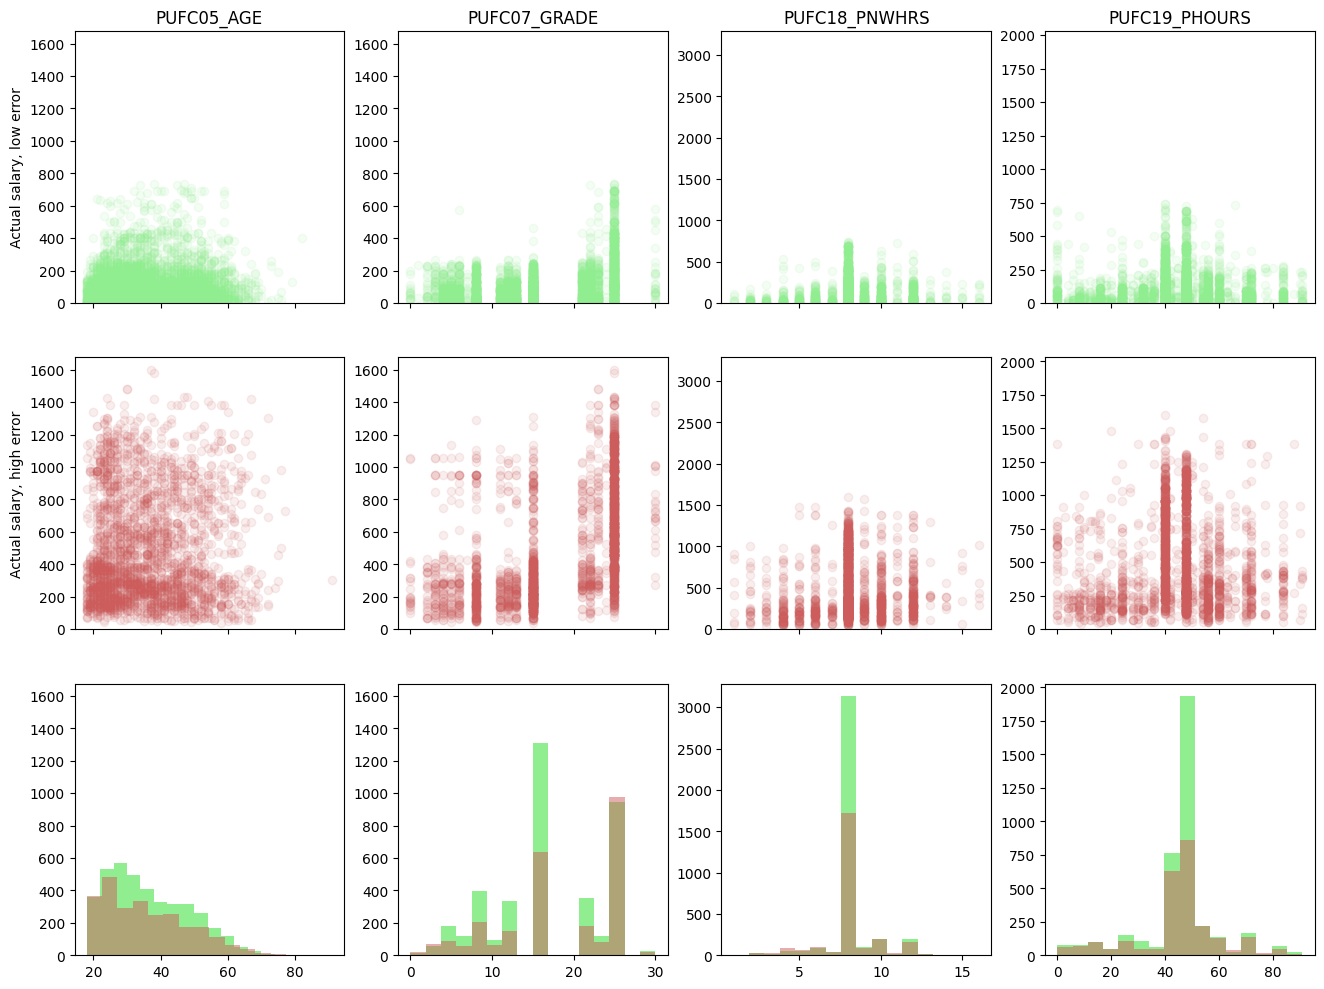

In [76]:
fig, axs = plt.subplots(3,4, figsize=(16,12), sharex="col", sharey="col")
axs[0,0].set_ylabel("Actual salary, low error")
axs[1,0].set_ylabel("Actual salary, high error")
for i, feat in enumerate(["PUFC05_AGE", "PUFC07_GRADE", "PUFC18_PNWHRS", "PUFC19_PHOURS"]):
    axs[0,i].set_title(feat)
    axs[0,i].scatter(low_error_instances[feat], low_error_instances["error"], color="lightgreen", alpha=0.1)
    axs[1,i].scatter(high_error_instances[feat], high_error_instances["error"], color="indianred", alpha=0.1)
    axs[2,i].hist(low_error_instances[feat], color="lightgreen", bins=16)
    axs[2,i].hist(high_error_instances[feat], color="indianred", bins=16, alpha=0.5)

plt.show()

Finally, a check of Naive Bayes's performance based on various features reveal a similar story for the most part to the other two models, with the exception of it being capable of predicting higher salary values more accurately. Naive Bayes's method of "generalizations" by grouping together similar values is the reason why it performs better than either kNN or LinReg with higher values. Although it has less data to work with, it can assume predictions by using what it *does* know and extrapolating from there without regarding how it would fit the median region, unlike the former two whose methods of comparing others and graphing a line do not work as well for predicting larger values in this dataset.

### 7.4 Comparing the models

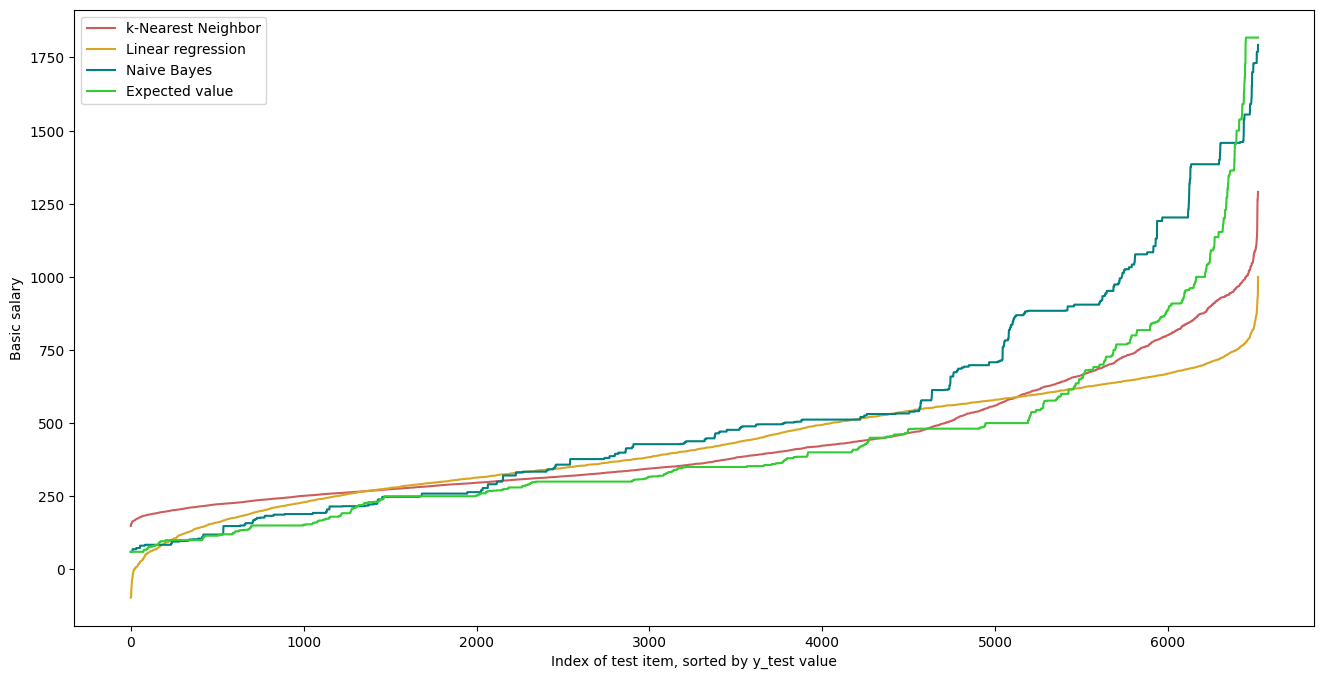

In [77]:
tempMerge = np.column_stack((mBest_predict, pred_test["linreg"], pred_test["gnb"], y_test))
tempMerge.sort(axis=0)
plt.figure(figsize=(16, 8))
plt.plot(tempMerge[:,0], color="indianred")
plt.plot(tempMerge[:,1], color="goldenrod")
plt.plot(tempMerge[:,2], color="teal")
plt.plot(tempMerge[:,3], color="limegreen")
plt.xlabel("Index of test item, sorted by y_test value")
plt.ylabel("Basic salary")
plt.legend(["k-Nearest Neighbor", "Linear regression", "Naive Bayes", "Expected value"])

plt.show()

The above plot shows how each of the models stack up against each other when dealing with the test data set. From here, we can see that kNN and Linear Regression have similar plots, however the latter is more inaccurate. On the other hand, Naive Bayes is more prone to generaliations and tends to be less accurate around `y=500`, however matches up with the expected value again for higher salary counts.

In [78]:
error_instances_linreg

index  PUFREG  PUFC04_SEX  PUFC05_AGE  PUFC07_GRADE  PUFC18_PNWHRS  \
0     166078      16           1          24            12             12   
1     140878      13           2          52             8             10   
2      65602       7           1          37            12              8   
3      48725       6           1          48            25              8   
4     127173      13           1          27            25              8   
...      ...     ...         ...         ...           ...            ...   
6517   45929       6           1          26            15              8   
6518   14871       3           2          38            13              2   
6519  118466      13           2          42            22              8   
6520  144483      14           2          20            15             10   
6521  105290      11           2          22            25              8   

      PUFC19_PHOURS  PUFC25_PBASIC   predicted       error  overunder  
0              84.0          267.0  264.363321    2.636679        1.0  
1              50.0          300.0  291.190511    8.809489        1.0  
2              48.0          400.0  299.036024  100.963976        1.0  
3              56.0          250.0  645.078393  395.078393       -1.0  
4              40.0          481.0  625.991299  144.991299       -1.0  
...             ...            ...         ...         ...        ...  
6517           48.0          287.0  315.214904   28.214904       -1.0  
6518           14.0          300.0  222.808723   77.191277        1.0  
6519           48.0          410.0  549.651238  139.651238       -1.0  
6520           60.0          134.0  284.868033  150.868033       -1.0  
6521           56.0          213.0  493.491624  280.491624       -1.0  

[6522 rows x 11 columns]

# Section 8. Improving model performance

A possible avenue for looking towards model performance would be looking towards the dataset again. Below, we see that the column `PUFREG` are actually composed of nominal values.

In [79]:
df_selected.describe()

PUFREG    PUFC04_SEX    PUFC05_AGE  PUFC07_GRADE  PUFC18_PNWHRS  \
count  32609.000000  32609.000000  32609.000000  32609.000000   32609.000000   
mean       9.268852      1.378607     35.888282     16.957711       8.164126   
std        4.537185      0.485047     12.171004      7.042587       1.640085   
min        1.000000      1.000000     18.000000      0.000000       1.000000   
25%        5.000000      1.000000     26.000000     12.000000       8.000000   
50%       10.000000      1.000000     34.000000     15.000000       8.000000   
75%       13.000000      2.000000     45.000000     25.000000       8.000000   
max       17.000000      2.000000     99.000000     30.000000      16.000000   

       PUFC19_PHOURS  
count   32609.000000  
mean       44.432427  
std        15.356473  
min         0.000000  
25%        40.000000  
50%        48.000000  
75%        48.000000  
max        91.000000

The other columns like `PUFC05_AGE`, `PUFC07_GRADE`, `PUFC18_PNWHRS`, `PUFC19_PHOURS` are numerical values. The other two are categorical in nature. It is possible that their values are interpreted as numerical and therefore they may affect the computation. A fix for `PUFREG` can be done through one-hot encoding.

One-hot encoding is typically done for categorical variables, which in turn will add `n - 1` features to the data set. Given that, categorical variables with high cardinality such as `PUFREG` is not optimal for one-hot encoding. The many added features at that point may not help the model at all, thus no relationship between the feature and label can be formed. 

In [80]:
# Apply one-hot encoding to PUFREG
X_training = pd.get_dummies(X_training, columns=['PUFREG'], prefix='REG', drop_first=True)
X_validation = pd.get_dummies(X_validation, columns=['PUFREG'], prefix='REG', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['PUFREG'], prefix='REG', drop_first=True)

X_training = X_training.astype(int)
X_validation = X_training.astype(int)
X_test = X_test.astype(int)

# Display dataset summary
print(X_training.describe())
print(X_validation.describe())
print(X_test.describe())

         PUFC04_SEX    PUFC05_AGE  PUFC07_GRADE  PUFC18_PNWHRS  PUFC19_PHOURS  \
count  19565.000000  19565.000000  19565.000000   19565.000000   19565.000000   
mean       1.377306     35.834909     16.978380       8.160848      44.260670   
std        0.484725     12.200434      7.039872       1.641705      15.413096   
min        1.000000     18.000000      0.000000       1.000000       0.000000   
25%        1.000000     26.000000     13.000000       8.000000      40.000000   
50%        1.000000     34.000000     15.000000       8.000000      48.000000   
75%        2.000000     44.000000     25.000000       8.000000      48.000000   
max        2.000000     99.000000     30.000000      16.000000      91.000000   

              REG_2         REG_3         REG_4         REG_5         REG_6  \
count  19565.000000  19565.000000  19565.000000  19565.000000  19565.000000   
mean       0.028725      0.090263      0.061027      0.041247      0.069665   
std        0.167036      0.286566

Although `PUFC04_SEX` is a nominal value with low cardinality (2), we do not need to implement one-hot encoding for it. It is because that the values that are already present in the dataset is 1 or 2. If we were to implement one-hot encoding, it will still be displayed as one column but with the values as either 0 or 1. It is basically the same.

## 8.1 Remodeling 

### 8.1.1 K-Nearest Neighbors

We can reimplement K-Nearest Neighbors and also get the best K using the code below. This code is also used earlier. 

In [81]:
# Skip if simply testing code because this will take long or lower the max range of K

knn = KNeighborsRegressor()

# Testing K from 10 to 100
param_grid = {'n_neighbors': list(range(10, 30))} 

# GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_training, y_training)

# Display best K value and store in different variable
best_k_2 = grid_search.best_params_['n_neighbors']
print(f"Best K: {best_k_2}")

Best K: 25


In [82]:
# Best K is 25 if range 10, 30 unless RANDOM_SEED is changed

knn_mBest_2 = KNeighborsRegressor(n_neighbors = best_k_2)
knn_mBest_2.fit(X_training, y_training)
mBest_predict_2 = knn_mBest_2.predict(X_test)
rmse_kBest_2 = np.sqrt(mean_squared_error(y_test, mBest_predict_2))

print("RMSE of Best K KNN Model: ", rmse_kBest_2)

RMSE of Best K KNN Model:  233.89403416799786


We can find out if this is a better RMSE by reversing the log transformation on the predicted test values.

In [83]:
print("RMSE of First Model: ", rmse_kBest)
print("RMSE of Remodel: ", rmse_kBest_2)

RMSE of First Model:  235.1279367567935
RMSE of Remodel:  233.89403416799786


Given the lower value of the remodeled KNN regressor, it is safe to say that is improved. The cause for this could possibly be that the distances that so apparent for the `PUFREG` feature was negated. But seeing how little the model improved, it could indicate that the `PUFREG` feature was not as important with relation to predicting the label.

### 8.1.2 Linear Regression

We can move on towards linear regression. Again, we make use of the earlier established code for building the model. 

In [84]:
lin_models = {
    "linreg": LinearRegression(),
    "ridge": Ridge(alpha=100, random_state = RANDOM_SEED),
    "lasso": Lasso(alpha=100, random_state = RANDOM_SEED),
    "sgd_se": SGDRegressor(loss="squared_error", random_state = RANDOM_SEED),
    "sgd_h": SGDRegressor(loss="huber", random_state = RANDOM_SEED),
    "sgd_ei": SGDRegressor(loss="epsilon_insensitive", random_state = RANDOM_SEED),
}


# Same param_grid for the initial model
param_grid = {
    "ridge": {"alpha": [0.1, 1, 10, 100]},
    "lasso": {"alpha": [0.1, 1, 10, 100]},
    "sgd_se": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
    "sgd_h": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
    "sgd_ei": {"alpha": [0.0001, 0.001, 0.01, 0.1], "max_iter": [1000, 5000, 10000], "eta0": [0.01, 0.1, 1]},
}

In [85]:
# Skip or refactor code if you don't want to wait

best_models = {}
for name, model in lin_models.items():
    if name in param_grid:  
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_training, y_training)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_training, y_training)  
        best_models[name] = model

C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Ma

In [86]:
for name, model in best_models.items():
    if name in param_grid:
        best_params = {param: model.get_params()[param] for param in param_grid[name]}
        print(f"Best parameters for {name}: {best_params}")
        print()

Best parameters for ridge: {'alpha': 100}

Best parameters for lasso: {'alpha': 0.1}

Best parameters for sgd_se: {'alpha': 0.1, 'max_iter': 1000, 'eta0': 0.01}

Best parameters for sgd_h: {'alpha': 0.0001, 'max_iter': 1000, 'eta0': 0.1}

Best parameters for sgd_ei: {'alpha': 0.0001, 'max_iter': 1000, 'eta0': 0.01}



In [87]:
pred_test = {}
for m in best_models: # best_models contain the best hyperparameters 
    pred_train = best_models[m].predict(X_training)
    rmse = np.sqrt(mean_squared_error(y_training, pred_train))
    print(f"RMSE of model {m} on training: {rmse}")
print()
for i, m in enumerate(best_models):
    pred_test[m] = best_models[m].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test[m]))
    print(f"RMSE of model {m} on test: {rmse}")

RMSE of model linreg on training: 254.17271187757356
RMSE of model ridge on training: 254.2065082584928
RMSE of model lasso on training: 254.18866024755093
RMSE of model sgd_se on training: 432.0028305995424
RMSE of model sgd_h on training: 272.73461532179374
RMSE of model sgd_ei on training: 270.13796466911776

RMSE of model linreg on test: 246.62589731666426
RMSE of model ridge on test: 246.72697613573237
RMSE of model lasso on test: 246.68104657367746
RMSE of model sgd_se on test: 428.5022915895492
RMSE of model sgd_h on test: 263.5913569023667
RMSE of model sgd_ei on test: 260.84749456107323


Compared to the earlier values of the RMSEs for the linear regression model, the RMSEs for the remodel is lower. This means that the remodel is performing better. The reason for this could be because of the many added features due to one-hot encoding. Since the cardinality of `PUFREG` is 18, then 17 'new' features was added. Again, the previous `PUFREG` feature may have affected the initial model, making it interpret the nominal values as numerical. 

### 8.1.3 Naive Bayes

Lastly, Naive Bayes can be reimplemented with the code below.

In [88]:
for m in nb_models:
    nb_models[m].fit(X_training, y_training)

In [89]:
for m in nb_models:
    pred_train = nb_models[m].predict(X_training)
    rmse = np.sqrt(mean_squared_error(y_training, pred_train))
    print(f"RMSE of model {m} on training: {rmse}")
    
print()

for m in nb_models:
    pred_test[m] = nb_models[m].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test[m]))
    print(f"RMSE of model {m} on testing: {rmse}")

RMSE of model gnb on training: 353.93538829156506
RMSE of model mnb1 on training: 371.9739680621767
RMSE of model mnb25 on training: 420.97192491188457
RMSE of model mnb100 on training: 386.59530080386253
RMSE of model cnb1 on training: 378.69129648329704
RMSE of model cnb25 on training: 381.11046744697114
RMSE of model cnb100 on training: 388.8440080041033

RMSE of model gnb on testing: 354.34152708456384
RMSE of model mnb1 on testing: 371.7141154498374
RMSE of model mnb25 on testing: 415.337725900587
RMSE of model mnb100 on testing: 379.10958215752777
RMSE of model cnb1 on testing: 370.5547175268264
RMSE of model cnb25 on testing: 372.6667037641672
RMSE of model cnb100 on testing: 376.3484143027248


Explanation needed here. RMSE is generally lower than initial model.

# Section 9. Model performance summary

# Section 10. Insights and conclusions

# Section 11. References

1. [Understanding the Difference Between Target Encoding and Frequency Encoding](https://sagarikakathuria29.medium.com/understanding-the-difference-between-target-encoding-and-frequency-encoding-1d9bd264b8e) Considered for encoding `PUFREG`
2. [One-Hot, Label, Target, and K-Fold Target Encoding, Clearly Explained!!!](https://www.youtube.com/watch?v=589nCGeWG1w)
3. [Curse of Dimensionality in Machine Learning](https://www.geeksforgeeks.org/curse-of-dimensionality-in-machine-learning/)